<br>

<br><center><img src="https://storage.googleapis.com/kaggle-competitions/kaggle/27923/logos/header.png?t=2021-06-02-20-30-25" width=100%></center>

<h2 style="text-align: center; font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: underline; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">UWM - GI Tract Image Segmentation Challenge<br>End-to-End Pipeline w/ DeepLab3</h2>
<h5 style="text-align: center; font-family: Verdana; font-size: 12px; font-style: normal; font-weight: bold; text-decoration: None; text-transform: none; letter-spacing: 1px; color: black; background-color: #ffffff;">CREATED BY: DARIEN SCHETTLER</h5>

<br>

---

<br>

<center><div class="alert alert-block alert-warning" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 18px;">👏 &nbsp; IF YOU FORK THIS OR FIND THIS HELPFUL &nbsp; 👏</b><br><br><b style="font-size: 22px; color: darkorange">PLEASE UPVOTE!</b><br><br>This was a lot of work for me and while it may seem silly, it makes me feel appreciated when others like my work. 😅
</div></center>

<center><div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 18px;">🙏 &nbsp; THIS NOTEBOOK HEAVILY REFERENCES <a href="https://keras.io/examples/vision/deeplabv3_plus/#building-the-deeplabv3-model">THIS TUTORIAL</a>  &nbsp; 🙏</b></div></center>




<p id="toc"></p>

<br><br>

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: teal; background-color: #ffffff;">TABLE OF CONTENTS</h1>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#imports">0&nbsp;&nbsp;&nbsp;&nbsp;IMPORTS</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#setup">1&nbsp;&nbsp;&nbsp;&nbsp;SETUP</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#helper_functions">2&nbsp;&nbsp;&nbsp;&nbsp;HELPER FUNCTIONS</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#create_dataset">3&nbsp;&nbsp;&nbsp;&nbsp;DATASET CREATION</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#model_training">4&nbsp;&nbsp;&nbsp;&nbsp;MODEL TRAINING</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#model_inference">5&nbsp;&nbsp;&nbsp;&nbsp;MODEL INFERENCE</a></h3>

---

<br>

<a id="imports"></a>

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: teal;" id="imports">0&nbsp;&nbsp;IMPORTS&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

In [1]:
print("\n... IMPORTS STARTING ...\n")

import os
os.environ["TF_GPU_ALLOCATOR"]="cuda_malloc_async"

print("\n\tVERSION INFORMATION")
# Machine Learning and Data Science Imports
import tensorflow as tf; print(f"\t\t– TENSORFLOW VERSION: {tf.__version__}");
import tensorflow_hub as tfhub; print(f"\t\t– TENSORFLOW HUB VERSION: {tfhub.__version__}");
import tensorflow_addons as tfa; print(f"\t\t– TENSORFLOW ADDONS VERSION: {tfa.__version__}");
import pandas as pd; pd.options.mode.chained_assignment = None;
import numpy as np; print(f"\t\t– NUMPY VERSION: {np.__version__}");
import sklearn; print(f"\t\t– SKLEARN VERSION: {sklearn.__version__}");
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from pandarallel import pandarallel; pandarallel.initialize();
from sklearn.model_selection import GroupKFold, StratifiedKFold

# # RAPIDS
# import cudf, cupy, cuml
# from cuml.neighbors import NearestNeighbors
# from cuml.manifold import TSNE, UMAP

# Built In Imports
from kaggle_datasets import KaggleDatasets
from collections import Counter
from datetime import datetime
from glob import glob
import warnings
import requests
import hashlib
import imageio
import IPython
import sklearn
import urllib
import zipfile
import pickle
import random
import shutil
import string
import json
import math
import time
import gzip
import ast
import sys
import io
import os
import gc
import re

# Visualization Imports
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm; tqdm.pandas();
import plotly.express as px
import seaborn as sns
from PIL import Image, ImageEnhance
import matplotlib; print(f"\t\t– MATPLOTLIB VERSION: {matplotlib.__version__}");
from matplotlib import animation, rc; rc('animation', html='jshtml')
import plotly
import PIL
import cv2

import plotly.io as pio
print(pio.renderers)

def seed_it_all(seed=7):
    """ Attempt to be Reproducible """
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

    
print("\n\n... IMPORTS COMPLETE ...\n")

print("\n... SEEDING FOR DETERMINISTIC BEHAVIOUR ...\n")
seed_it_all()


... IMPORTS STARTING ...


	VERSION INFORMATION
		– TENSORFLOW VERSION: 2.6.2
		– TENSORFLOW HUB VERSION: 0.12.0
		– TENSORFLOW ADDONS VERSION: 0.14.0
		– NUMPY VERSION: 1.20.3
		– SKLEARN VERSION: 1.0.1
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
		– MATPLOTLIB VERSION: 3.5.1
Renderers configuration
-----------------------
    Default renderer: 'kaggle'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']



... IMPORTS COMPLETE ...


... SEEDING FOR DETERMINISTIC BEHAVIOUR ...



<br>

<a id="background_information"></a>

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: teal; background-color: #ffffff;" id="setup">1&nbsp;&nbsp;SETUP&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

---


<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">1.1 ACCELERATOR DETECTION</h3>

---

In order to use **`TPU`**, we use **`TPUClusterResolver`** for the initialization which is necessary to connect to the remote cluster and initialize cloud TPUs. Let's go over two important points

1. When using TPU on Kaggle, you don't need to specify arguments for **`TPUClusterResolver`**
2. However, on **G**oogle **C**ompute **E**ngine (**GCE**), you will need to do the following:

<br>

```python
# The name you gave to the TPU to use
TPU_WORKER = 'my-tpu-name'

# or you can also specify the grpc path directly
# TPU_WORKER = 'grpc://xxx.xxx.xxx.xxx:8470'

# The zone you chose when you created the TPU to use on GCP.
ZONE = 'us-east1-b'

# The name of the GCP project where you created the TPU to use on GCP.
PROJECT = 'my-tpu-project'

tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu=TPU_WORKER, zone=ZONE, project=PROJECT)
```

<div class="alert alert-block alert-danger" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">🛑 &nbsp; WARNING:</b><br><br>- Although the Tensorflow documentation says it is the <b>project name</b> that should be provided for the argument <b><code>`project`</code></b>, it is actually the <b>Project ID</b>, that you should provide. This can be found on the GCP project dashboard page.<br>
</div>

<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📖 &nbsp; REFERENCES:</b><br><br>
    - <a href="https://www.tensorflow.org/guide/tpu#tpu_initialization"><b>Guide - Use TPUs</b></a><br>
    - <a href="https://www.tensorflow.org/api_docs/python/tf/distribute/cluster_resolver/TPUClusterResolver"><b>Doc - TPUClusterResolver</b></a><br>

</div>

In [2]:
print(f"\n... ACCELERATOR SETUP STARTING ...\n")

# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is set. On Kaggle this is always the case.
    TPU = tf.distribute.cluster_resolver.TPUClusterResolver()  
except ValueError:
    TPU = None

if TPU:
    print(f"\n... RUNNING ON TPU - {TPU.master()}...")
    tf.config.experimental_connect_to_cluster(TPU)
    tf.tpu.experimental.initialize_tpu_system(TPU)
    strategy = tf.distribute.experimental.TPUStrategy(TPU)
else:
    print(f"\n... RUNNING ON CPU/GPU ...")
    physical_devices = tf.config.list_physical_devices('GPU')
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
    except:
        # Invalid device or cannot modify virtual devices once initialized.
        pass
    
    # Yield the default distribution strategy in Tensorflow
    #   --> Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

# What Is a Replica?
#    --> A single Cloud TPU device consists of FOUR chips, each of which has TWO TPU cores. 
#    --> Therefore, for efficient utilization of Cloud TPU, a program should make use of each of the EIGHT (4x2) cores. 
#    --> Each replica is essentially a copy of the training graph that is run on each core and 
#        trains a mini-batch containing 1/8th of the overall batch size
N_REPLICAS = strategy.num_replicas_in_sync
    
print(f"... # OF REPLICAS: {N_REPLICAS} ...\n")

print(f"\n... ACCELERATOR SETUP COMPLTED ...\n")


... ACCELERATOR SETUP STARTING ...


... RUNNING ON CPU/GPU ...
... # OF REPLICAS: 1 ...


... ACCELERATOR SETUP COMPLTED ...



<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">1.2 COMPETITION DATA ACCESS</h3>

---

TPUs read data must be read directly from **G**oogle **C**loud **S**torage **(GCS)**. Kaggle provides a utility library – **`KaggleDatasets`** – which has a utility function **`.get_gcs_path`** that will allow us to access the location of our input datasets within **GCS**.<br><br>

<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📌 &nbsp; TIPS:</b><br><br>- If you have multiple datasets attached to the notebook, you should pass the name of a specific dataset to the <b><code>`get_gcs_path()`</code></b> function. <i>In our case, the name of the dataset is the name of the directory the dataset is mounted within.</i><br><br>
</div>

In [3]:
print("\n... DATA ACCESS SETUP STARTED ...\n")

if TPU:
    # Google Cloud Dataset path to training and validation images
    DATA_DIR = KaggleDatasets().get_gcs_path('uw-madison-gi-tract-image-segmentation')
    save_locally = tf.saved_model.SaveOptions(experimental_io_device='/job:localhost')
    load_locally = tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')
else:
    # Local path to training and validation images
    DATA_DIR = "/kaggle/input/uw-madison-gi-tract-image-segmentation"
    save_locally = None
    load_locally = None

print(f"\n... DATA DIRECTORY PATH IS:\n\t--> {DATA_DIR}")

print(f"\n... IMMEDIATE CONTENTS OF DATA DIRECTORY IS:")
for file in tf.io.gfile.glob(os.path.join(DATA_DIR, "*")): print(f"\t--> {file}")

print("\n\n... DATA ACCESS SETUP COMPLETED ...\n")


... DATA ACCESS SETUP STARTED ...


... DATA DIRECTORY PATH IS:
	--> /kaggle/input/uw-madison-gi-tract-image-segmentation

... IMMEDIATE CONTENTS OF DATA DIRECTORY IS:
	--> /kaggle/input/uw-madison-gi-tract-image-segmentation/sample_submission.csv
	--> /kaggle/input/uw-madison-gi-tract-image-segmentation/train.csv
	--> /kaggle/input/uw-madison-gi-tract-image-segmentation/train


... DATA ACCESS SETUP COMPLETED ...



<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">1.3 LEVERAGING XLA OPTIMIZATIONS</h3>

---


**XLA** (Accelerated Linear Algebra) is a domain-specific compiler for linear algebra that can accelerate TensorFlow models with potentially no source code changes. **The results are improvements in speed and memory usage**.

<br>

When a TensorFlow program is run, all of the operations are executed individually by the TensorFlow executor. Each TensorFlow operation has a precompiled GPU/TPU kernel implementation that the executor dispatches to.

XLA provides us with an alternative mode of running models: it compiles the TensorFlow graph into a sequence of computation kernels generated specifically for the given model. Because these kernels are unique to the model, they can exploit model-specific information for optimization.<br><br>

<div class="alert alert-block alert-danger" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">🛑 &nbsp; WARNING:</b><br><br>- XLA can not currently compile functions where dimensions are not inferrable: that is, if it's not possible to infer the dimensions of all tensors without running the entire computation<br>
</div>

<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📌 &nbsp; NOTE:</b><br><br>- XLA compilation is only applied to code that is compiled into a graph (in <b>TF2</b> that's only a code inside <b><code>tf.function</code></b>).<br>- The <b><code>jit_compile</code></b> API has must-compile semantics, i.e. either the entire function is compiled with XLA, or an <b><code>errors.InvalidArgumentError</code></b> exception is thrown)
</div>

<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📖 &nbsp; REFERENCE:</b><br><br>    - <a href="https://www.tensorflow.org/xla"><b>XLA: Optimizing Compiler for Machine Learning</b></a><br>
</div>

In [4]:
print(f"\n... XLA OPTIMIZATIONS STARTING ...\n")

print(f"\n... CONFIGURE JIT (JUST IN TIME) COMPILATION ...\n")
# enable XLA optmizations (10% speedup when using @tf.function calls)
tf.config.optimizer.set_jit(False)

print(f"\n... XLA OPTIMIZATIONS COMPLETED ...\n")


... XLA OPTIMIZATIONS STARTING ...


... CONFIGURE JIT (JUST IN TIME) COMPILATION ...


... XLA OPTIMIZATIONS COMPLETED ...



<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">1.4 BASIC DATA DEFINITIONS & INITIALIZATIONS</h3>

---


In [5]:
print("\n... BASIC DATA SETUP STARTING ...\n\n")

# Open the training dataframe and display the initial dataframe
TRAIN_DIR = os.path.join(DATA_DIR, "train")
TRAIN_CSV = os.path.join(DATA_DIR, "train.csv")
train_df = pd.read_csv(TRAIN_CSV)

# Get all training images
all_train_images = glob(os.path.join(TRAIN_DIR, "**", "*.png"), recursive=True)

print("\n... ORIGINAL TRAINING DATAFRAME... \n")
display(train_df)

TEST_DIR = os.path.join(DATA_DIR, "test")
SS_CSV   = os.path.join(DATA_DIR, "sample_submission.csv")
ss_df = pd.read_csv(SS_CSV)

# Get all testing images if there are any
all_test_images = glob(os.path.join(TEST_DIR, "**", "*.png"), recursive=True)

print("\n\n\n... ORIGINAL SUBMISSION DATAFRAME... \n")
display(ss_df)

# For debugging purposes when the test set hasn't been substituted we will know
DEBUG=len(all_test_images)==0

if DEBUG:
    TEST_DIR = TRAIN_DIR
    all_test_images = all_train_images
    first_50_cases = train_df.id.apply(lambda x: x.split("_", 1)[0]).unique()[:50]
    ss_df = train_df[train_df.id.apply(lambda x: x.split("_", 1)[0]).isin(first_50_cases)]
    ss_df = ss_df[["id", "class"]]
    ss_df["predicted"] = ""
    
    print("\n\n\n... DEBUG SUBMISSION DATAFRAME... \n")
    display(ss_df)

classes = ["Large Bowel", "Small Bowel", "Stomach"]
sf_classes = ["lb", "sb", "st"]
SF2LF = {_sf:_lf for _sf,_lf in zip(sf_classes, classes)}
LF2SF = {_lf:_sf for _sf,_lf in zip(sf_classes, classes)}

print(f"\n\n\n... ARE WE DEBUGGING: {DEBUG}... \n")

print("\n... BASIC DATA SETUP FINISHED ...\n\n")


... BASIC DATA SETUP STARTING ...



... ORIGINAL TRAINING DATAFRAME... 



id        class segmentation
0       case123_day20_slice_0001  large_bowel          NaN
1       case123_day20_slice_0001  small_bowel          NaN
2       case123_day20_slice_0001      stomach          NaN
3       case123_day20_slice_0002  large_bowel          NaN
4       case123_day20_slice_0002  small_bowel          NaN
...                          ...          ...          ...
115483    case30_day0_slice_0143  small_bowel          NaN
115484    case30_day0_slice_0143      stomach          NaN
115485    case30_day0_slice_0144  large_bowel          NaN
115486    case30_day0_slice_0144  small_bowel          NaN
115487    case30_day0_slice_0144      stomach          NaN

[115488 rows x 3 columns]




... ORIGINAL SUBMISSION DATAFRAME... 



Empty DataFrame
Columns: [id, class, predicted]
Index: []




... DEBUG SUBMISSION DATAFRAME... 



id        class predicted
0      case123_day20_slice_0001  large_bowel          
1      case123_day20_slice_0001  small_bowel          
2      case123_day20_slice_0001      stomach          
3      case123_day20_slice_0002  large_bowel          
4      case123_day20_slice_0002  small_bowel          
...                         ...          ...       ...
65563  case124_day19_slice_0143  small_bowel          
65564  case124_day19_slice_0143      stomach          
65565  case124_day19_slice_0144  large_bowel          
65566  case124_day19_slice_0144  small_bowel          
65567  case124_day19_slice_0144      stomach          

[65568 rows x 3 columns]




... ARE WE DEBUGGING: True... 


... BASIC DATA SETUP FINISHED ...




<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">1.5 UPDATE DATAFRAMES WITH ACCESSIBLE EXTRA INFORMATION</h3>

---

I wrapped the logic in a preprocessing function

In [6]:
def get_filepath_from_partial_identifier(_ident, file_list):
    return [x for x in file_list if _ident in x][0]

def df_preprocessing(df, globbed_file_list, is_test=False):
    """ The preprocessing steps applied to get column information """
    # 1. Get Case-ID as a column (str and int)
    df["case_id_str"] = df["id"].apply(lambda x: x.split("_", 2)[0])
    df["case_id"] = df["id"].apply(lambda x: int(x.split("_", 2)[0].replace("case", "")))

    # 2. Get Day as a column
    df["day_num_str"] = df["id"].apply(lambda x: x.split("_", 2)[1])
    df["day_num"] = df["id"].apply(lambda x: int(x.split("_", 2)[1].replace("day", "")))

    # 3. Get Slice Identifier as a column
    df["slice_id"] = df["id"].apply(lambda x: x.split("_", 2)[2])

    # 4. Get full file paths for the representative scans
    df["_partial_ident"] = (globbed_file_list[0].rsplit("/", 4)[0]+"/"+ # /kaggle/input/uw-madison-gi-tract-image-segmentation/train/
                           df["case_id_str"]+"/"+ # .../case###/
                           df["case_id_str"]+"_"+df["day_num_str"]+ # .../case###_day##/
                           "/scans/"+df["slice_id"]) # .../slice_#### 
    _tmp_merge_df = pd.DataFrame({"_partial_ident":[x.rsplit("_",4)[0] for x in globbed_file_list], "f_path":globbed_file_list})
    df = df.merge(_tmp_merge_df, on="_partial_ident").drop(columns=["_partial_ident"])

    # 5. Get slice dimensions from filepath (int in pixels)
    df["slice_h"] = df["f_path"].apply(lambda x: int(x[:-4].rsplit("_",4)[1]))
    df["slice_w"] = df["f_path"].apply(lambda x: int(x[:-4].rsplit("_",4)[2]))

    # 6. Pixel spacing from filepath (float in mm)
    df["px_spacing_h"] = df["f_path"].apply(lambda x: float(x[:-4].rsplit("_",4)[3]))
    df["px_spacing_w"] = df["f_path"].apply(lambda x: float(x[:-4].rsplit("_",4)[4]))

    if not is_test:
        # 7. Merge 3 Rows Into A Single Row (As This/Segmentation-RLE Is The Only Unique Information Across Those Rows)
        l_bowel_df = df[df["class"]=="large_bowel"][["id", "segmentation"]].rename(columns={"segmentation":"lb_seg_rle"})
        s_bowel_df = df[df["class"]=="small_bowel"][["id", "segmentation"]].rename(columns={"segmentation":"sb_seg_rle"})
        stomach_df = df[df["class"]=="stomach"][["id", "segmentation"]].rename(columns={"segmentation":"st_seg_rle"})
        df = df.merge(l_bowel_df, on="id", how="left")
        df = df.merge(s_bowel_df, on="id", how="left")
        df = df.merge(stomach_df, on="id", how="left")
        df = df.drop_duplicates(subset=["id",]).reset_index(drop=True)
        df["lb_seg_flag"] = df["lb_seg_rle"].apply(lambda x: not pd.isna(x))
        df["sb_seg_flag"] = df["sb_seg_rle"].apply(lambda x: not pd.isna(x))
        df["st_seg_flag"] = df["st_seg_rle"].apply(lambda x: not pd.isna(x))
        df["n_segs"] = df["lb_seg_flag"].astype(int)+df["sb_seg_flag"].astype(int)+df["st_seg_flag"].astype(int)

    # 8. Reorder columns to the a new ordering (drops class and segmentation as no longer necessary)
    new_col_order = ["id", "f_path", "n_segs",
                     "lb_seg_rle", "lb_seg_flag",
                     "sb_seg_rle", "sb_seg_flag", 
                     "st_seg_rle", "st_seg_flag",
                     "slice_h", "slice_w", "px_spacing_h", 
                     "px_spacing_w", "case_id_str", "case_id", 
                     "day_num_str", "day_num", "slice_id", "predicted"]
    if is_test: new_col_order.insert(1, "class")
    new_col_order = [_c for _c in new_col_order if _c in df.columns]
    df = df[new_col_order]
    
    return df

print("\n... UPDATING DATAFRAMES WITH ACCESSIBLE INFORMATION STARTED ...\n\n")

print("\n... UPDATED TRAINING DATAFRAME... \n")
train_df = df_preprocessing(train_df, all_train_images)
display(train_df)

ss_df = df_preprocessing(ss_df, all_test_images, is_test=True)
print("\n\n\n... UPDATED SUBMISSION DATAFRAME... \n")
display(ss_df)

print("\n... UPDATING DATAFRAMES WITH ACCESSIBLE INFORMATION FINISHED ...\n\n")


... UPDATING DATAFRAMES WITH ACCESSIBLE INFORMATION STARTED ...



... UPDATED TRAINING DATAFRAME... 



id  \
0      case123_day20_slice_0001   
1      case123_day20_slice_0002   
2      case123_day20_slice_0003   
3      case123_day20_slice_0004   
4      case123_day20_slice_0005   
...                         ...   
38491    case30_day0_slice_0140   
38492    case30_day0_slice_0141   
38493    case30_day0_slice_0142   
38494    case30_day0_slice_0143   
38495    case30_day0_slice_0144   

                                                  f_path  n_segs lb_seg_rle  \
0      /kaggle/input/uw-madison-gi-tract-image-segmen...       0        NaN   
1      /kaggle/input/uw-madison-gi-tract-image-segmen...       0        NaN   
2      /kaggle/input/uw-madison-gi-tract-image-segmen...       0        NaN   
3      /kaggle/input/uw-madison-gi-tract-image-segmen...       0        NaN   
4      /kaggle/input/uw-madison-gi-tract-image-segmen...       0        NaN   
...                                                  ...     ...        ...   
38491  /kaggle/input/uw-madison-gi-tract-image-segmen...       0        NaN   
38492  /kaggle/input/uw-madison-gi-tract-image-segmen...       0        NaN   
38493  /kaggle/input/uw-madison-gi-tract-image-segmen...       0        NaN   
38494  /kaggle/input/uw-madison-gi-tract-image-segmen...       0        NaN   
38495  /kaggle/input/uw-madison-gi-tract-image-segmen...       0        NaN   

       lb_seg_flag sb_seg_rle  sb_seg_flag st_seg_rle  st_seg_flag  slice_h  \
0            False        NaN        False        NaN        False      266   
1            False        NaN        False        NaN        False      266   
2            False        NaN        False        NaN        False      266   
3            False        NaN        False        NaN        False      266   
4            False        NaN        False        NaN        False      266   
...            ...        ...          ...        ...          ...      ...   
38491        False        NaN        False        NaN        False      266   
38492        False        NaN        False        NaN        False      266   
38493        False        NaN        False        NaN        False      266   
38494        False        NaN        False        NaN        False      266   
38495        False        NaN        False        NaN        False      266   

       slice_w  px_spacing_h  px_spacing_w case_id_str  case_id day_num_str  \
0          266           1.5           1.5     case123      123       day20   
1          266           1.5           1.5     case123      123       day20   
2          266           1.5           1.5     case123      123       day20   
3          266           1.5           1.5     case123      123       day20   
4          266           1.5           1.5     case123      123       day20   
...        ...           ...           ...         ...      ...         ...   
38491      266           1.5           1.5      case30       30        day0   
38492      266           1.5           1.5      case30       30        day0   
38493      266           1.5           1.5      case30       30        day0   
38494      266           1.5           1.5      case30       30        day0   
38495      266           1.5           1.5      case30       30        day0   

       day_num    slice_id  
0           20  slice_0001  
1           20  slice_0002  
2           20  slice_0003  
3           20  slice_0004  
4           20  slice_0005  
...        ...         ...  
38491        0  slice_0140  
38492        0  slice_0141  
38493        0  slice_0142  
38494        0  slice_0143  
38495        0  slice_0144  

[38496 rows x 18 columns]




... UPDATED SUBMISSION DATAFRAME... 



id        class  \
0      case123_day20_slice_0001  large_bowel   
1      case123_day20_slice_0001  small_bowel   
2      case123_day20_slice_0001      stomach   
3      case123_day20_slice_0002  large_bowel   
4      case123_day20_slice_0002  small_bowel   
...                         ...          ...   
65563  case124_day19_slice_0143  small_bowel   
65564  case124_day19_slice_0143      stomach   
65565  case124_day19_slice_0144  large_bowel   
65566  case124_day19_slice_0144  small_bowel   
65567  case124_day19_slice_0144      stomach   

                                                  f_path  slice_h  slice_w  \
0      /kaggle/input/uw-madison-gi-tract-image-segmen...      266      266   
1      /kaggle/input/uw-madison-gi-tract-image-segmen...      266      266   
2      /kaggle/input/uw-madison-gi-tract-image-segmen...      266      266   
3      /kaggle/input/uw-madison-gi-tract-image-segmen...      266      266   
4      /kaggle/input/uw-madison-gi-tract-image-segmen...      266      266   
...                                                  ...      ...      ...   
65563  /kaggle/input/uw-madison-gi-tract-image-segmen...      266      266   
65564  /kaggle/input/uw-madison-gi-tract-image-segmen...      266      266   
65565  /kaggle/input/uw-madison-gi-tract-image-segmen...      266      266   
65566  /kaggle/input/uw-madison-gi-tract-image-segmen...      266      266   
65567  /kaggle/input/uw-madison-gi-tract-image-segmen...      266      266   

       px_spacing_h  px_spacing_w case_id_str  case_id day_num_str  day_num  \
0               1.5           1.5     case123      123       day20       20   
1               1.5           1.5     case123      123       day20       20   
2               1.5           1.5     case123      123       day20       20   
3               1.5           1.5     case123      123       day20       20   
4               1.5           1.5     case123      123       day20       20   
...             ...           ...         ...      ...         ...      ...   
65563           1.5           1.5     case124      124       day19       19   
65564           1.5           1.5     case124      124       day19       19   
65565           1.5           1.5     case124      124       day19       19   
65566           1.5           1.5     case124      124       day19       19   
65567           1.5           1.5     case124      124       day19       19   

         slice_id predicted  
0      slice_0001            
1      slice_0001            
2      slice_0001            
3      slice_0002            
4      slice_0002            
...           ...       ...  
65563  slice_0143            
65564  slice_0143            
65565  slice_0144            
65566  slice_0144            
65567  slice_0144            

[65568 rows x 13 columns]


... UPDATING DATAFRAMES WITH ACCESSIBLE INFORMATION FINISHED ...




<br>


<a id="helper_functions"></a>


<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: teal; background-color: #ffffff;" id="helper_functions">
    2&nbsp;&nbsp;HELPER FUNCTION & CLASSES&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a>
</h1>

---

In [7]:
# ref: https://www.kaggle.com/paulorzp/run-length-encode-and-decode
# modified from: https://www.kaggle.com/inversion/run-length-decoding-quick-start
def rle_decode(mask_rle, shape, color=1):
    """ TBD
    
    Args:
        mask_rle (str): run-length as string formated (start length)
        shape (tuple of ints): (height,width) of array to return 
    
    Returns: 
        Mask (np.array)
            - 1 indicating mask
            - 0 indicating background

    """
    # Split the string by space, then convert it into a integer array
    s = np.array(mask_rle.split(), dtype=int)

    # Every even value is the start, every odd value is the "run" length
    starts = s[0::2] - 1
    lengths = s[1::2]
    ends = starts + lengths

    # The image image is actually flattened since RLE is a 1D "run"
    if len(shape)==3:
        h, w, d = shape
        img = np.zeros((h * w, d), dtype=np.float32)
    else:
        h, w = shape
        img = np.zeros((h * w,), dtype=np.float32)

    # The color here is actually just any integer you want!
    for lo, hi in zip(starts, ends):
        img[lo : hi] = color
        
    # Don't forget to change the image back to the original shape
    return img.reshape(shape)

# https://www.kaggle.com/namgalielei/which-reshape-is-used-in-rle
def rle_decode_top_to_bot_first(mask_rle, shape):
    """ TBD
    
    Args:
        mask_rle (str): run-length as string formated (start length)
        shape (tuple of ints): (height,width) of array to return 
    
    Returns:
        Mask (np.array)
            - 1 indicating mask
            - 0 indicating background

    """
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape((shape[1], shape[0]), order='F').T  # Reshape from top -> bottom first

# ref.: https://www.kaggle.com/stainsby/fast-tested-rle
def rle_encode(img):
    """ TBD
    
    Args:
        img (np.array): 
            - 1 indicating mask
            - 0 indicating background
    
    Returns: 
        run length as string formated
    """
    
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

def flatten_l_o_l(nested_list):
    """ Flatten a list of lists """
    return [item for sublist in nested_list for item in sublist]

def load_json_to_dict(json_path):
    """ Helper function to load a json file into a dictionary """
    with open(json_path) as json_file:
        data = json.load(json_file)
    return data

def tf_load_png(img_path):
    """ Helper to load an image using pure tf """
    return tf.image.decode_png(tf.io.read_file(img_path), channels=3)

def open_gray16(_path, normalize=True, to_rgb=False):
    """ Helper to open competition specific files from path
    
    Args:
        _path (str): Path to the image on the LOCAL file system
        normalize (bool, optional): Whether or not to coerce image to be between 0-1
        to_rgb (bool, optional): Whether or not to tile the grayscale image to produce a pseudo RGB image
        
    Returns:
        The image as a numpy array
    """
    if normalize:
        if to_rgb:
            return np.tile(np.expand_dims(cv2.imread(_path, cv2.IMREAD_ANYDEPTH)/65535., axis=-1), 3)
        else:
            return cv2.imread(_path, cv2.IMREAD_ANYDEPTH)/65535.
    else:
        if to_rgb:
            return np.tile(np.expand_dims(cv2.imread(_path, cv2.IMREAD_ANYDEPTH), axis=-1), 3)
        else:
            return cv2.imread(_path, cv2.IMREAD_ANYDEPTH)
        
def rle_decode_tf(mask_rle, shape):
    """ Pure tensorflow RLE decoding function for easy pipelining
    
    Args:
        mask_rle (str): The Run Length Encoded mask
        shape (tuple): The shape of the mask we are decoding
    
    Returns:
        A 1D tf.constant represending the decoded mask
    """
    
    shape = tf.convert_to_tensor(shape, tf.int64)
    size = tf.math.reduce_prod(shape)
    
    # Split string
    s = tf.strings.split(mask_rle)
    s = tf.strings.to_number(s, tf.int64)
    
    # Get starts and lengths
    starts = s[::2] - 1
    lens = s[1::2]
    
    # Make ones to be scattered
    total_ones = tf.reduce_sum(lens)
    ones = tf.ones([total_ones], tf.uint8)
    
    # Make scattering indices
    r = tf.range(total_ones)
    lens_cum = tf.math.cumsum(lens)
    s = tf.searchsorted(lens_cum, r, 'right')
    idx = r + tf.gather(starts - tf.pad(lens_cum[:-1], [(1, 0)]), s)
    
    # Scatter ones into flattened mask
    mask_flat = tf.scatter_nd(tf.expand_dims(idx, 1), ones, [size])
    
    # Reshape into mask
    return tf.reshape(mask_flat, shape)

<br>


<a id="create_dataset"></a>


<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: teal; background-color: #ffffff;" id="create_dataset">
    3&nbsp;&nbsp;DATASET CREATION&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a>
</h1>

---

<br>

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">3.0 CREATE DATASET FOLDS</h3>

---

* ~~Remove rows with no segmentation masks for now...~~ (this resulted in way too many false positives)
* Remove erroneous files
* 8 folds
* Grouped by case
* Stratified on Unique Segmentation String (built to indicate which combination of seg masks are present)

**NOTE: We are just taking a single fold for the purposes of this notebook...**

In [8]:
if DEBUG:
    N_FOLDS = 8
    gkf = GroupKFold(n_splits=N_FOLDS) 
    
    remove_ids = ["case7_day0", "case81_day30"]
    for _id in remove_ids:
        train_df = train_df[~train_df.id.str.contains(_id)].reset_index(drop=True)
    
    # train_df = train_df[train_df.n_segs>0].reset_index(drop=True)
    train_df["which_segs"] = train_df.lb_seg_flag.astype(int).astype(str)+\
                             train_df.sb_seg_flag.astype(int).astype(str)+\
                             train_df.st_seg_flag.astype(int).astype(str)

    for train_idxs, val_idxs in gkf.split(train_df["id"], train_df["which_segs"], train_df["case_id"]):
        sub_train_df=train_df.iloc[train_idxs]
        N_TRAIN = len(sub_train_df)
        sub_train_df=sub_train_df.sample(N_TRAIN).reset_index(drop=True)

        sub_val_df=train_df.iloc[val_idxs]
        N_VAL = len(sub_val_df)
        sub_val_df=sub_val_df.sample(N_VAL).reset_index(drop=True)

        break

    # Fix the way we handled nan
    sub_train_df.lb_seg_rle.fillna("", inplace=True)
    sub_train_df.sb_seg_rle.fillna("", inplace=True)
    sub_train_df.st_seg_rle.fillna("", inplace=True)
    
    # Fix the way we handled nan
    sub_val_df.lb_seg_rle.fillna("", inplace=True)
    sub_val_df.sb_seg_rle.fillna("", inplace=True)
    sub_val_df.st_seg_rle.fillna("", inplace=True)

    print("\nFOLD 1: TRAIN DF\n\n")
    display(sub_train_df)

    print("\n\n\n\nFOLD 1: VAL DF\n\n")
    display(sub_val_df)


FOLD 1: TRAIN DF




id  \
0       case47_day27_slice_0092   
1        case11_day0_slice_0002   
2       case136_day0_slice_0064   
3       case29_day13_slice_0065   
4      case143_day23_slice_0144   
...                         ...   
33451    case54_day0_slice_0105   
33452    case88_day0_slice_0136   
33453  case135_day17_slice_0136   
33454  case129_day20_slice_0056   
33455   case113_day0_slice_0119   

                                                  f_path  n_segs  \
0      /kaggle/input/uw-madison-gi-tract-image-segmen...       2   
1      /kaggle/input/uw-madison-gi-tract-image-segmen...       0   
2      /kaggle/input/uw-madison-gi-tract-image-segmen...       2   
3      /kaggle/input/uw-madison-gi-tract-image-segmen...       1   
4      /kaggle/input/uw-madison-gi-tract-image-segmen...       0   
...                                                  ...     ...   
33451  /kaggle/input/uw-madison-gi-tract-image-segmen...       2   
33452  /kaggle/input/uw-madison-gi-tract-image-segmen...       0   
33453  /kaggle/input/uw-madison-gi-tract-image-segmen...       0   
33454  /kaggle/input/uw-madison-gi-tract-image-segmen...       2   
33455  /kaggle/input/uw-madison-gi-tract-image-segmen...       0   

                                              lb_seg_rle  lb_seg_flag  \
0      29631 18 29985 26 30340 32 30697 36 31050 43 3...         True   
1                                                               False   
2      29695 3 29958 10 30223 14 30488 16 30754 18 31...         True   
3                                                               False   
4                                                               False   
...                                                  ...          ...   
33451  30392 6 30657 8 30922 10 31187 12 31453 12 317...         True   
33452                                                           False   
33453                                                           False   
33454  47365 6 47723 10 48081 13 48434 22 48791 26 49...         True   
33455                                                           False   

                                              sb_seg_rle  sb_seg_flag  \
0      29298 4 29657 9 30016 12 30375 15 30734 17 310...         True   
1                                                               False   
2                                                               False   
3                                                               False   
4                                                               False   
...                                                  ...          ...   
33451  23264 14 23518 34 23782 37 24046 39 24108 5 24...         True   
33452                                                           False   
33453                                                           False   
33454                                                           False   
33455                                                           False   

                                              st_seg_rle  st_seg_flag  \
0                                                               False   
1                                                               False   
2      31270 6 31534 12 31799 14 32063 17 32328 19 32...         True   
3      15564 22 15822 34 16085 40 16349 44 16614 47 1...         True   
4                                                               False   
...                                                  ...          ...   
33451                                                           False   
33452                                                           False   
33453                                                           False   
33454  51656 8 52015 11 52374 13 52733 14 53092 16 53...         True   
33455                                                           False   

       slice_h  slice_w  px_spacing_h  px_spacing_w case_id_str  case_id  \
0          360      310           1.5           1.5      case47       47   
1       





FOLD 1: VAL DF




id  \
0      case18_day19_slice_0002   
1       case36_day0_slice_0130   
2       case18_day0_slice_0106   
3     case133_day25_slice_0141   
4      case36_day10_slice_0142   
...                        ...   
4747   case18_day21_slice_0033   
4748  case149_day12_slice_0070   
4749   case80_day10_slice_0118   
4750    case81_day0_slice_0013   
4751   case133_day0_slice_0081   

                                                 f_path  n_segs  \
0     /kaggle/input/uw-madison-gi-tract-image-segmen...       0   
1     /kaggle/input/uw-madison-gi-tract-image-segmen...       0   
2     /kaggle/input/uw-madison-gi-tract-image-segmen...       2   
3     /kaggle/input/uw-madison-gi-tract-image-segmen...       0   
4     /kaggle/input/uw-madison-gi-tract-image-segmen...       0   
...                                                 ...     ...   
4747  /kaggle/input/uw-madison-gi-tract-image-segmen...       0   
4748  /kaggle/input/uw-madison-gi-tract-image-segmen...       2   
4749  /kaggle/input/uw-madison-gi-tract-image-segmen...       2   
4750  /kaggle/input/uw-madison-gi-tract-image-segmen...       0   
4751  /kaggle/input/uw-madison-gi-tract-image-segmen...       2   

                                             lb_seg_rle  lb_seg_flag  \
0                                                              False   
1                                                              False   
2     41155 18 41514 21 41873 23 42233 24 42592 25 4...         True   
3                                                              False   
4                                                              False   
...                                                 ...          ...   
4747                                                           False   
4748  20088 10 20351 16 20614 22 20877 28 21134 39 2...         True   
4749  22760 4 23024 21 23270 6 23289 24 23535 8 2355...         True   
4750                                                           False   
4751  30409 5 30766 9 31125 11 31485 12 31844 14 322...         True   

                                             sb_seg_rle  sb_seg_flag  \
0                                                              False   
1                                                              False   
2     25004 10 25353 23 25711 27 26064 43 26420 49 2...         True   
3                                                              False   
4                                                              False   
...                                                 ...          ...   
4747                                                           False   
4748                                                           False   
4749  24385 7 24650 9 24915 11 25179 14 25444 16 257...         True   
4750                                                           False   
4751  34785 4 35137 14 35496 16 35855 19 36215 24 36...         True   

                                             st_seg_rle  st_seg_flag  slice_h  \
0                                                              False      360   
1                                                              False      360   
2                                                              False      360   
3                                                              False      360   
4                                                              False      266   
...                                                 ...          ...      ...   
4747                                                           False      360   
4748  25148 9 25411 14 25675 18 25939 21 26203 25 26...         True      266   
4749                                                           False      266   
4750                                                           False      266   
4751                                                           False      360   

      slice_w  px_spacing_h  px_spacing_w case_id_str  case_id day_num_str  \
0         310           1.5      

<br>

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">3.1 CREATE MASK DATASET</h3>

---

* We will create our masks to have a shape of $W \times H \times 3$, where each channel is binary mask for a particular segmentation class in the order
    * Channel 0 --> "Large Bowel"
    * Channel 1 --> "Small Bowel"
    * Channel 2 --> "Stomach"
* We will first frame this problem as simple categorical segmentation and simply overlap values from 2-->0
    * i.e. if we have overlapping Stomach, and Small Bowel... the Small Bowel mask will overwrite the Stomach mask
    * i.e. if we have overlapping Large Bowel and Small Bowel... the Large Bowel mask will overwrite the Small Bowel mask
* I will save both version of this dataset so we can try experimenting later
    * NOTE: I think I should just be able to change the loss and we'll be good to go... but for now I will try and score with what I have...

**NOTE: At this point we have to determine the size of our dataset... as most images are fairly small, let's target a size of <font color="blue">$256 \times 256$</font>**

In [9]:
IMAGE_SHAPE = SEG_SHAPE = (256,256)

def make_seg_mask(row, output_dir, resize_to):
    """ Make a segmentation mask from a dataframe row
    
    Args:
        row (pd.Series): The respective row to convert
        output_dir (str): Path to the output directory for which we will dump the mask
        resize_to (tuple): The shape to resize our mask to following creation
        
    Returns:
        A string pointing to the newly generated numpy mask
    """
    _output_style = "multiclass" if "multiclass" in output_dir else "multilabel"
    _slice_shape = (row.slice_w, row.slice_h)
    
    if not pd.isna(row.lb_seg_rle):
        lb_mask = rle_decode(row.lb_seg_rle, _slice_shape, )
    else:
        lb_mask = np.zeros(_slice_shape)
        
    if not pd.isna(row.sb_seg_rle):
        sb_mask = rle_decode(row.sb_seg_rle, _slice_shape)
    else:
        sb_mask = np.zeros(_slice_shape)
        
    if not pd.isna(row.st_seg_rle):
        st_mask = rle_decode(row.st_seg_rle, _slice_shape)
    else:
        st_mask = np.zeros(_slice_shape)
    
    if _output_style=="multiclass":
        mask_arr = st_mask*3                         # stomach     = 3
        mask_arr = np.where(sb_mask==1, 2, mask_arr) # small bowel = 2
        mask_arr = np.where(lb_mask==1, 1, mask_arr) # large bowel = 1
    else:
        mask_arr = np.stack([lb_mask, sb_mask, st_mask], axis=-1)
    
    mask_arr = cv2.resize(mask_arr, resize_to, interpolation=cv2.INTER_NEAREST).astype(np.uint8)
    mask_path = os.path.join(output_dir, f"{row.id}_mask")
    np.save(mask_path, mask_arr)
    return mask_path+".npy"

STYLE = "multiclass"
if DEBUG: 
    _output_dir = f"/kaggle/working/{STYLE}/npy_files"
    if not os.path.isdir(_output_dir): os.makedirs(_output_dir, exist_ok=True)
    train_df[f"{STYLE}_mask_path"] = train_df.progress_apply(lambda _row: make_seg_mask(_row, _output_dir, resize_to=SEG_SHAPE), axis=1)
    sub_train_df = sub_train_df.merge(train_df[["id", f"{STYLE}_mask_path"]], on="id")
    sub_val_df = sub_val_df.merge(train_df[["id", f"{STYLE}_mask_path"]], on="id")

  0%|          | 0/38208 [00:00<?, ?it/s]

<br>

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">3.2 CREATE TF.DATA.DATASET</h3>

---

**INPUT**
* Raw Image (256x256x3)

**OUTPUT/TARGET**
* Segmented Image (256x256x[3|1])

---


**TEST SOME AUGMENTATIONS**|

2023-04-13 18:10:30.849473: E tensorflow/core/common_runtime/gpu/gpu_process_state.cc:69] TF_GPU_ALLOCATOR=cuda_malloc_async environment found, but TensorFlow was not compiled with CUDA 11.2+.


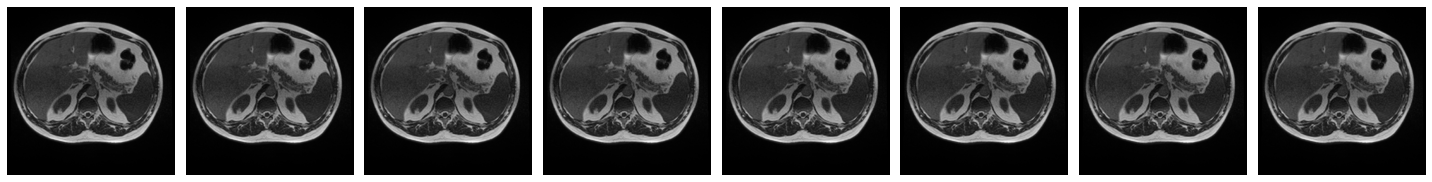

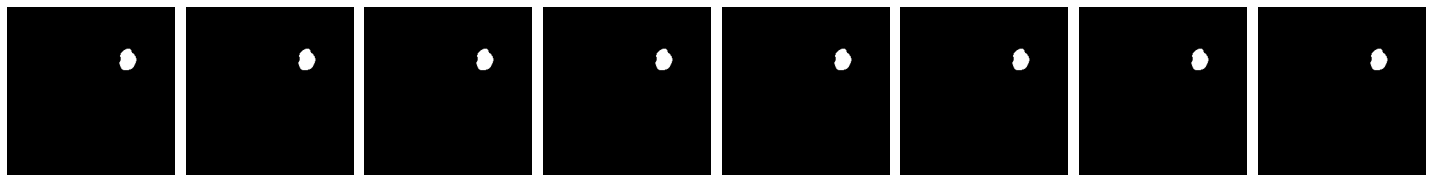

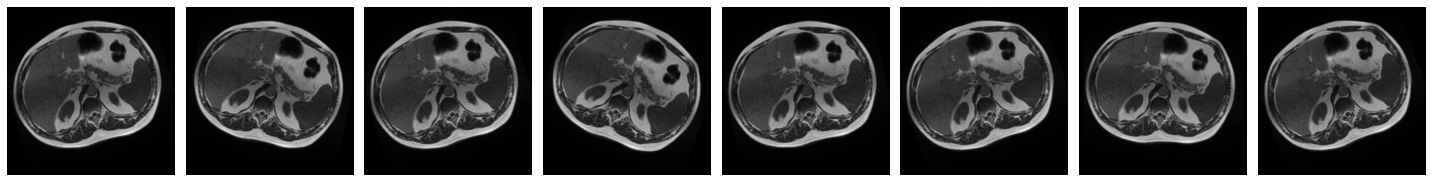

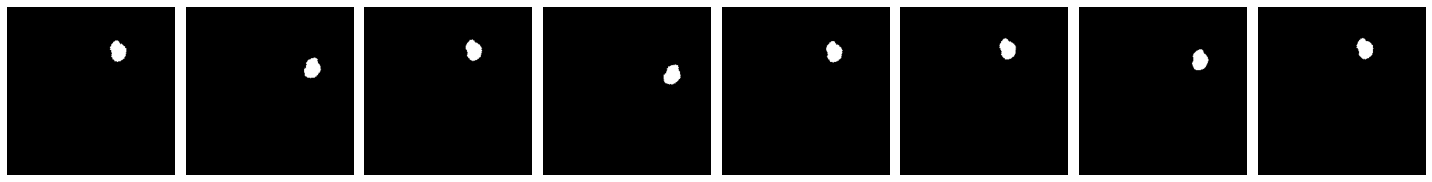

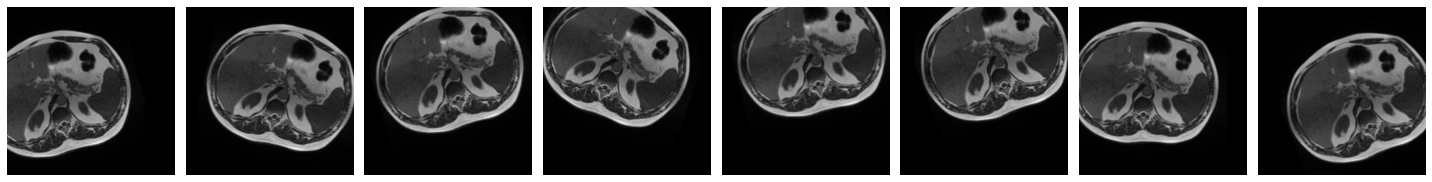

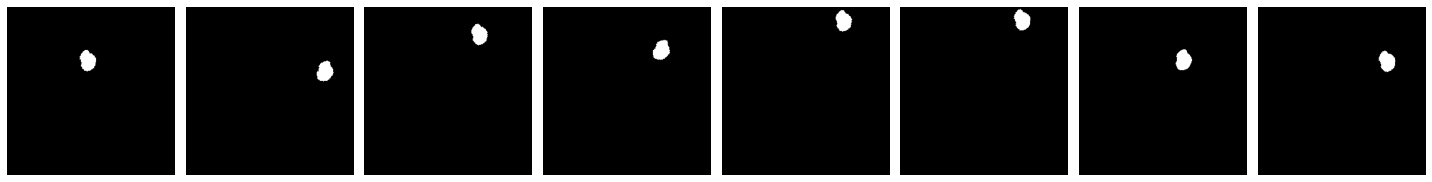

In [10]:
dummy_id = 80

_dummy_img = tf.constant(cv2.imread(train_df.f_path[dummy_id], -1))
_dummy_img = _dummy_img/tf.reduce_max(_dummy_img)
_dummy_mask = rle_decode(train_df.lb_seg_rle[dummy_id], (train_df.slice_w[dummy_id], train_df.slice_h[dummy_id]))

_dummy_batch = tf.repeat(tf.expand_dims(tf.repeat(tf.expand_dims(_dummy_img, axis=-1), 3, axis=-1), axis=0), 8, axis=0)
_dummy_mask_batch = tf.cast(tf.repeat(tf.expand_dims(tf.repeat(tf.expand_dims(_dummy_mask, axis=-1), 3, axis=-1), axis=0), 8, axis=0), tf.uint8)

_degree_rot = tf.random.uniform([8,], minval=tf.constant(-0.4), maxval=tf.constant(0.4))
_dummy_aug_batch = tfa.image.rotate(_dummy_batch, _degree_rot, interpolation="bilinear")
_dummy_aug_mask_batch = tfa.image.rotate(_dummy_mask_batch, _degree_rot, interpolation="bilinear")


plt.figure(figsize=(20,10))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(_dummy_batch[i])
    plt.axis(False)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,10))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(tf.cast(_dummy_mask_batch[i], tf.float32))
    plt.axis(False)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,10))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(_dummy_aug_batch[i])
    plt.axis(False)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,10))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(tf.cast(_dummy_aug_mask_batch[i], tf.float32))
    plt.axis(False)
plt.tight_layout()
plt.show()

_t_mag = tf.random.uniform([8,2], minval=tf.constant(-50.0), maxval=tf.constant(50.0))
_dummy_aug_batch = tfa.image.translate(_dummy_aug_batch, translations=_t_mag, interpolation="bilinear")
_dummy_aug_mask_batch = tfa.image.translate(_dummy_aug_mask_batch, translations=_t_mag, interpolation="nearest")

plt.figure(figsize=(20,10))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(_dummy_aug_batch[i])
    plt.axis(False)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,10))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(tf.cast(_dummy_aug_mask_batch[i], tf.float32))
    plt.axis(False)
plt.tight_layout()
plt.show()

(24, 256, 256, 3) (24, 256, 256, 1)


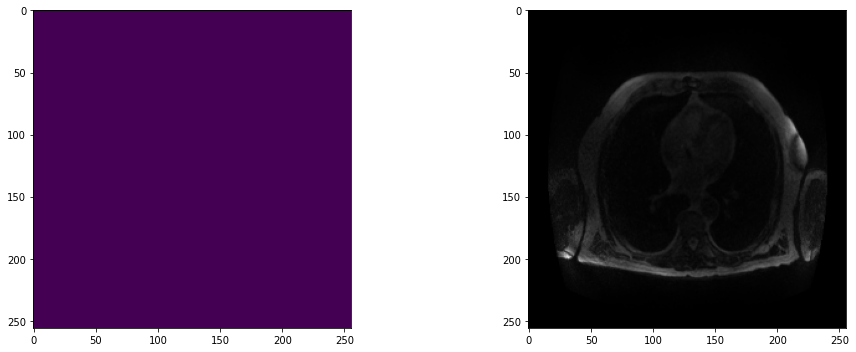

In [11]:
def tf_load_image(path):
    """ Load an image with the correct shape using only TF
    
    Args:
        path (tf.string): Path to the image to be loaded
        resize_to (tuple, optional): Size to reshape image
    
    Returns:
        3 channel tf.Constant image ready for training/inference
    
    """
    img_bytes = tf.io.read_file(path)
    img = tf.image.decode_png(img_bytes, channels=3, dtype=tf.uint16)
    # img = 255.*(img/tf.constant(32767, dtype=tf.uint16))
    img = 255.*(img/tf.reduce_max(img))
    img = tf.image.resize(img, (tf.constant(IMAGE_SHAPE[0]), tf.constant(IMAGE_SHAPE[1])))
    return img


def tf_load_mask(rle_strs, root_shape, style="multiclass"):
    """ Pure tensorflow function to load multiple rles into an RGB array based on output style """
    tf_masks = [tf.cast(tf.image.resize(tf.expand_dims(rle_decode_tf(rle_str, root_shape), axis=-1), size=(tf.constant(SEG_SHAPE[0]), tf.constant(SEG_SHAPE[1])), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR), tf.uint8) for rle_str in rle_strs]
    
    if style=="multilabel":
        return tf.concat(tf_masks, axis=-1)
    else:        
        _tf_masks = tf.zeros((*SEG_SHAPE, 1), dtype=tf.uint8)
        _tf_masks = tf_masks[2]*tf.constant(3, dtype=tf.uint8) # small bowel = 3
        _tf_masks = tf.where(tf_masks[1]==tf.constant(1, dtype=tf.uint8), tf.constant(2, dtype=tf.uint8), _tf_masks) # small bowel = 2
        _tf_masks = tf.where(tf_masks[0]==tf.constant(1, dtype=tf.uint8), tf.constant(1, dtype=tf.uint8), _tf_masks) # large bowel = 1
        return _tf_masks

def augment_batch(img_batch, mask_batch):
    """ Pipeline augmentation 
    
        - Right-Left Flipping (1/3 probability)
        - Rotation (2/3 probability)
        - Translation (2/3 probability)
    """
    # Simple augmentation
    if tf.random.uniform([])<=tf.constant(0.3333):
        img_batch = tf.image.flip_left_right(img_batch)
        mask_batch = tf.image.flip_left_right(mask_batch)
        
    # Random rotation
    if tf.random.uniform([])<=tf.constant(0.6666):
        degree_rot = tf.random.uniform([BATCH_SIZE,], minval=tf.constant(-0.4), maxval=tf.constant(0.4))
        img_batch = tfa.image.rotate(img_batch, degree_rot, interpolation="bilinear")
        mask_batch = tfa.image.rotate(mask_batch, degree_rot, interpolation="nearest")
    
    # Random translation
    if tf.random.uniform([])<=tf.constant(0.6666):
        _t_mag = tf.random.uniform([BATCH_SIZE,2], minval=tf.constant(-30.0), maxval=tf.constant(30.0))
        img_batch = tfa.image.translate(img_batch, translations=_t_mag, interpolation="bilinear")
        mask_batch = tfa.image.translate(mask_batch, translations=_t_mag, interpolation="nearest")
        
    return img_batch, mask_batch

def add_sample_weights(image_batch, mask_batch, _multiplier=1.5, _exp=0.25):
    """
    Incorporate class weighting as a third term in tf.data.Dataset
        
        BACKGROUND TRAINING DATA PIXEL COUNT (%)  : %98.3326
        LARGE BOWEL TRAINING DATA PIXEL COUNT (%) : %0.6883
        SMALL BOWEL TRAINING DATA PIXEL COUNT (%) : %0.6301
        STOMACH TRAINING DATA PIXEL COUNT (%)     : %0.3490

    """    
    # Add class weighting
    likelihood = tf.constant([0.983326, 0.06883, 0.06301, 0.03490])
    class_weights = tf.constant(_multiplier)*((tf.constant(1.0)-likelihood)**_exp)

    # Create an image of `sample_weights` by using the label at each pixel as an index into the `class weights`
    sample_weights_batch = tf.gather(class_weights, indices=tf.cast(mask_batch, tf.int32))
    
    return image_batch, mask_batch, sample_weights_batch

def model_preprocessing_train(img_batch, mask_batch):
    """ Model specific preprocessing for DeepLabV3 (training)"""
    img_batch = img_batch/tf.constant(127.5)-tf.constant(1.0)
    return img_batch, mask_batch
    
def model_preprocessing_test(img_batch):
    """ Model specific preprocessing for DeepLabV3 (testing)"""    
    img_batch = img_batch/tf.constant(127.5)-tf.constant(1.0)
    return img_batch

# Hyperparameters
BATCH_SIZE = 24
SHUFFLE_BUFFER = max(BATCH_SIZE*25, 500)
AUTOTUNE = tf.data.AUTOTUNE

# Whether or not to train?
DO_TRAIN=False
if not DEBUG: DO_TRAIN=False

if DEBUG:
    train_ds = tf.data.Dataset.from_tensor_slices((sub_train_df.f_path, (sub_train_df.lb_seg_rle, sub_train_df.sb_seg_rle, sub_train_df.st_seg_rle), (sub_train_df.slice_w,sub_train_df.slice_h)))
    val_ds = tf.data.Dataset.from_tensor_slices((sub_val_df.f_path, (sub_val_df.lb_seg_rle, sub_val_df.sb_seg_rle, sub_val_df.st_seg_rle), (sub_val_df.slice_w,sub_val_df.slice_h)))

    train_ds = train_ds.map(lambda x,y,z: (tf_load_image(x), tf_load_mask(y,z,style=STYLE)), num_parallel_calls=AUTOTUNE)
    val_ds = val_ds.map(lambda x,y,z: (tf_load_image(x), tf_load_mask(y,z,style=STYLE)), num_parallel_calls=AUTOTUNE)

    train_ds = train_ds.shuffle(SHUFFLE_BUFFER)\
                       .batch(BATCH_SIZE, drop_remainder=True)\
                       .map(augment_batch, num_parallel_calls=AUTOTUNE)\
                       .map(model_preprocessing_train, num_parallel_calls=AUTOTUNE)\
                       .map(add_sample_weights, num_parallel_calls=AUTOTUNE)\
                       .prefetch(AUTOTUNE)    
    
    # we only shuffle the validation a little because we don't want 
    # drop_remainder to hit the same images over and over...
    val_ds = val_ds.shuffle(SHUFFLE_BUFFER//5)\
                   .batch(BATCH_SIZE, drop_remainder=True)\
                   .map(model_preprocessing_train, num_parallel_calls=AUTOTUNE)\
                   .prefetch(AUTOTUNE)
    
    for _img_batch, _mask_batch in val_ds.take(1):
        print(_img_batch.shape, _mask_batch.shape)
        _img=_img_batch[0]
        _mask=_mask_batch[0]
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.imshow(tf.cast(_mask, tf.float32))

        plt.subplot(1,2,2)
        plt.imshow(tf.cast((_img+1)*127.5, tf.uint8))

        plt.tight_layout()
        plt.show()
        
# We only need every third row (hence the iloc[::3])
test_ds = tf.data.Dataset.from_tensor_slices(ss_df.iloc[::3].f_path.tolist())
test_ds = test_ds.map(lambda x: tf_load_image(x), num_parallel_calls=AUTOTUNE)

# This should be deterministic... i.e. the order of images will match the order of IDs
test_ds = test_ds.batch(BATCH_SIZE)\
                 .map(model_preprocessing_test, num_parallel_calls=AUTOTUNE)\
                 .prefetch(AUTOTUNE)

<br>


<a id="model_training"></a>


<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: teal; background-color: #ffffff;" id="model_training">
    4&nbsp;&nbsp;MODEL TRAINING&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a>
</h1>

---

<br>

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">4.1 BUILDING THE DEEPLABV3+ MODEL</h3>

<a href="https://keras.io/examples/vision/deeplabv3_plus/#building-the-deeplabv3-model"><b>[REF]</b></a>

---

<a href="https://arxiv.org/abs/1802.02611">DeepLabv3+</a> extends DeepLabv3 by adding an encoder-decoder structure. The encoder module processes multiscale contextual information by applying dilated convolution at multiple scales, while the decoder module refines the segmentation results along object boundaries. 

<center><img src="https://github.com/lattice-ai/DeepLabV3-Plus/raw/master/assets/deeplabv3_plus_diagram.png"></center>

**Dilated Convolution**: 
* With dilated convolution, as we go deeper in the network, we can keep the stride constant but with larger field-of-view without increasing the number of parameters or the amount of computation.
* Besides, it enables larger output feature maps, which is useful for semantic segmentation.

**Dilated Spatial Pyramid Pooling**
* The reason for using Dilated Spatial Pyramid Pooling is that it was shown that as the sampling rate becomes larger, the number of valid filter weights (i.e., weights that are applied to the valid feature region, instead of padded zeros) becomes smaller.

**The Encoder**
* The encoder features are first bilinearly upsampled by a factor 4, and then concatenated with the corresponding low-level features from the network backbone that have the same spatial resolution. 
* For this example, we use a **ResNet50** pretrained on ImageNet as the backbone model, and we use the low-level features from the **`conv4_block6_2_relu`** block (shown below) of the backbone.

In [12]:
def convolution_block(block_input, num_filters=256, kernel_size=3,
                      dilation_rate=1, padding="same", use_bias=False,):
    """ TBD """
    x = tf.keras.layers.Conv2D(filters=num_filters, 
                               kernel_size=kernel_size, 
                               dilation_rate=dilation_rate, 
                               padding=padding, 
                               use_bias=use_bias, 
                               kernel_initializer=tf.keras.initializers.HeNormal())(block_input)
    x = tf.keras.layers.BatchNormalization()(x)
    return tf.keras.layers.Activation("relu")(x)

def SqueezeAndExcite(inputs, ratio=8):
    init = inputs
    filters = init.shape[-1]
    se_shape = (1, 1, filters)
    
    se = tf.keras.layers.GlobalAveragePooling2D()(init)
    se = tf.keras.layers.Reshape(se_shape)(se)
    se = tf.keras.layers.Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = tf.keras.layers.Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)
    return init*se

def ASPP(inputs):
    """ Image Pooling """
    shape = inputs.shape
    y1 = tf.keras.layers.AveragePooling2D(pool_size=(shape[1], shape[2]))(inputs)
    y1 = tf.keras.layers.Conv2D(256, 1, padding="same", use_bias=False)(y1)
    y1 = tf.keras.layers.BatchNormalization()(y1)
    y1 = tf.keras.layers.Activation("relu")(y1)
    y1 = tf.keras.layers.UpSampling2D((shape[1], shape[2]), interpolation="bilinear")(y1)

    """ 1x1 conv """
    y2 = tf.keras.layers.Conv2D(256, 1, padding="same", use_bias=False)(inputs)
    y2 = tf.keras.layers.BatchNormalization()(y2)
    y2 = tf.keras.layers.Activation("relu")(y2)

    """ 3x3 conv rate=6 """
    y3 = tf.keras.layers.Conv2D(256, 3, padding="same", use_bias=False, dilation_rate=6)(inputs)
    y3 = tf.keras.layers.BatchNormalization()(y3)
    y3 = tf.keras.layers.Activation("relu")(y3)

    """ 3x3 conv rate=12 """
    y4 = tf.keras.layers.Conv2D(256, 3, padding="same", use_bias=False, dilation_rate=12)(inputs)
    y4 = tf.keras.layers.BatchNormalization()(y4)
    y4 = tf.keras.layers.Activation("relu")(y4)

    """ 3x3 conv rate=18 """
    y5 = tf.keras.layers.Conv2D(256, 3, padding="same", use_bias=False, dilation_rate=18)(inputs)
    y5 = tf.keras.layers.BatchNormalization()(y5)
    y5 = tf.keras.layers.Activation("relu")(y5)

    y = tf.keras.layers.Concatenate()([y1, y2, y3, y4, y5])
    y = tf.keras.layers.Conv2D(256, 1, padding="same", use_bias=False)(y)
    y = tf.keras.layers.BatchNormalization()(y)
    y = tf.keras.layers.Activation("relu")(y)

    return y

def DilatedSpatialPyramidPooling(dspp_input):
    """ TBD """
    x = tf.keras.layers.AveragePooling2D(pool_size=(HIGH_FEAT_LAYER_OUTPUT_SHAPE[-3], 
                                                    HIGH_FEAT_LAYER_OUTPUT_SHAPE[-2]))(dspp_input)
    x = convolution_block(x, kernel_size=1, use_bias=True)
    
    # Get layers to concatenate
    out_pool = tf.keras.layers.UpSampling2D(size=(HIGH_FEAT_LAYER_OUTPUT_SHAPE[-3]//x.shape[1], 
                                                  HIGH_FEAT_LAYER_OUTPUT_SHAPE[-2]//x.shape[2]), 
                                            interpolation="bilinear")(x)
    _out_layers = [out_pool,]+\
                  [convolution_block(dspp_input, 256, _k, _d) for _k, _d in zip((1,3,3,3), (1,6,12,18))]
    
    output = convolution_block(tf.keras.layers.Concatenate(axis=-1)(_out_layers), kernel_size=1)

    return output


def DeeplabV3Plus(backbone, low_feat_layer, high_feat_layer, n_classes, weights="imagenet", dropout=0.3):
    
    _inputs = tf.keras.layers.Input(shape=(*IMAGE_SHAPE, 3))
    encoder_bb = backbone(weights=weights, include_top=False, input_tensor=_inputs)
    
    x = encoder_bb.get_layer(high_feat_layer).output
    x = tf.keras.layers.Dropout(dropout)(x)
    x = ASPP(x)    
    
    input_a = tf.keras.layers.UpSampling2D(size=(IMAGE_SHAPE[0]//4//x.shape[1], 
                                                 IMAGE_SHAPE[1]//4//x.shape[2]), 
                                           interpolation="bilinear")(x)
    input_b = encoder_bb.get_layer(low_feat_layer).output
    input_b = tf.keras.layers.Dropout(dropout)(input_b)
    input_b = convolution_block(input_b, num_filters=48, kernel_size=1)

    x = tf.keras.layers.Concatenate(axis=-1)([input_a, input_b])
    
    x = SqueezeAndExcite(x)
    x = convolution_block(x)
    x = convolution_block(x)
    x = SqueezeAndExcite(x)
    
    x = tf.keras.layers.UpSampling2D(size=(IMAGE_SHAPE[0]//x.shape[1], 
                                           IMAGE_SHAPE[1]//x.shape[2]), 
                                     interpolation="bilinear",)(x)
    x = tf.keras.layers.Dropout(dropout/2)(x)
    _outputs = tf.keras.layers.Conv2D(n_classes, kernel_size=(1, 1), padding="same", activation="sigmoid" if STYLE=="multilabel" else "softmax")(x)
    return tf.keras.Model(inputs=_inputs, outputs=_outputs)

# If you change the backbone you will need to adjust this accordingly
BACKBONE = tf.keras.applications.ResNet50
RES_HIGH_FEAT_LAYER = "conv4_block6_2_relu"
RES_LOW_FEAT_LAYER = "conv2_block3_2_relu"
_dummy_model = BACKBONE(include_top=False, weights=None, input_shape=(*IMAGE_SHAPE, 3))
HIGH_FEAT_LAYER_OUTPUT_SHAPE = _dummy_model.get_layer(RES_HIGH_FEAT_LAYER).output_shape[1:]
LOW_FEAT_LAYER_OUTPUT_SHAPE = _dummy_model.get_layer(RES_LOW_FEAT_LAYER).output_shape[1:]

SUB_NODEBUG_MODEL_WT_PATH = "/kaggle/input/deeplav3-224-seaspp-public-weights/resnet50_256x256x3_multiclass"

if STYLE=="multiclass":
    N_CLASSES = len(classes)+1 # n_classses+background
else:
    N_CLASSES = len(classes) # n_classses (binary so background is 0 in each channel)

MODEL_INSPECT = "summary"

# We need this locally if we want to do all of this stuff without internet...
WEIGHT_PATH = "/kaggle/input/tf-keras-pretrained-model-weights/No Top/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"

if DO_TRAIN:
    deeplabv3plus = DeeplabV3Plus(backbone=BACKBONE, weights=WEIGHT_PATH,
                                  low_feat_layer=RES_LOW_FEAT_LAYER, 
                                  high_feat_layer=RES_HIGH_FEAT_LAYER, 
                                  n_classes=N_CLASSES)

    if MODEL_INSPECT=="plot":
        display(tf.keras.utils.plot_model(deeplabv3plus))
    elif MODEL_INSPECT=="summary":
        print(deeplabv3plus.summary())
else:
    deeplabv3plus = tf.keras.models.load_model(SUB_NODEBUG_MODEL_WT_PATH, compile=False)

<br>

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">4.2 TRAINING THE MODEL</h3>

<a href="https://keras.io/examples/vision/deeplabv3_plus/#building-the-deeplabv3-model"><b>[REF]</b></a>

---

In [13]:
# Custom Callback To Include in Callbacks List At Training Time
class GarbageCollectorCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()
        tf.keras.backend.clear_session()

def plot_history(_history, fold_num="1", metrics=("acc",)):
    """ TBD """
    fig = px.line(_history.history, 
                  x=range(len(_history.history["loss"])), 
                  y=["loss", "val_loss"],
                  labels={"value":"Loss (log-axis)", "x":"Epoch #"},
                  title=f"<b>FOLD {fold_num} MODEL - LOSS</b>", log_y=True
                  )
    fig.show()

    for _m in metrics:
        fig = px.line(_history.history, 
                      x=range(len(_history.history[_m])), 
                      y=[_m, f"val_{_m}"],
                      labels={"value":f"{_m} (log-axis)", "x":"Epoch #"},
                      title=f"<b>FOLD {fold_num} MODEL - {_m}</b>", log_y=True)
        fig.show()    

N_EPOCH = 20
if DO_TRAIN:
    OPTIMIZER = tf.keras.optimizers.Adam(0.0006666)
    if STYLE=="multiclass":
        LOSS = tf.keras.losses.SparseCategoricalCrossentropy()
    else:
        LOSS = tfa.losses.SigmoidFocalCrossEntropy()
        
    METRICS = ["acc"]
               

    _lr_cb = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.75, 
                                                  patience=2, verbose=1, mode="min")
    _es_cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss",  patience=4, 
                                              verbose=1, mode="min",
                                              restore_best_weights=True)
    _ckpt_cb = tf.keras.callbacks.ModelCheckpoint(f'./resnet50_{IMAGE_SHAPE[0]}x{IMAGE_SHAPE[1]}x3_{STYLE}', 
                                                  monitor='val_loss', mode="min",
                                                  save_best_only=True, options=save_locally)
    _gc_cb = GarbageCollectorCallback()
    CB_LIST = [_es_cb, _ckpt_cb, _lr_cb, _gc_cb]

    deeplabv3plus.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS,)
    history = deeplabv3plus.fit(train_ds, validation_data=val_ds, epochs=N_EPOCH, callbacks=CB_LIST)
    plot_history(history)

<br>

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">4.3 VALIDATE AND VISUALIZE</h3>

---

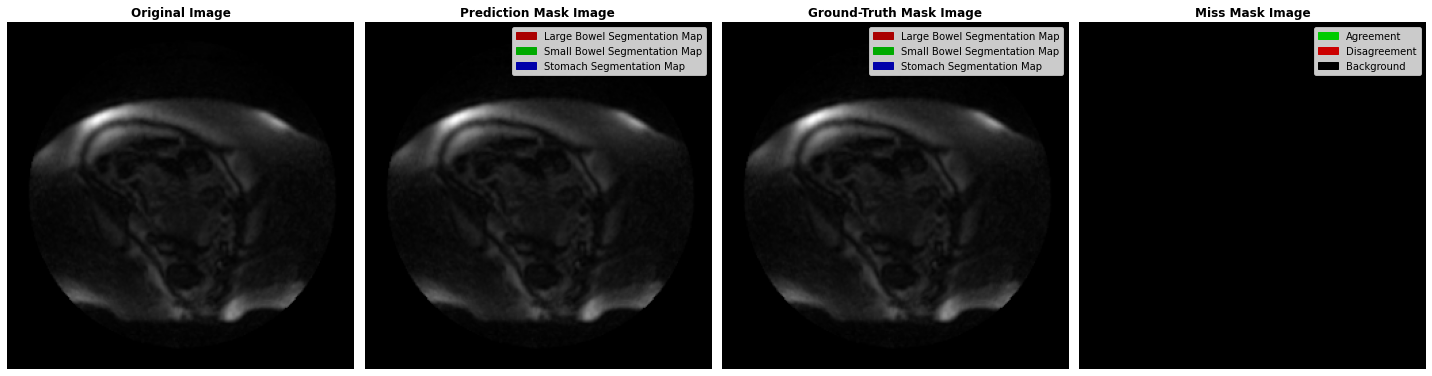

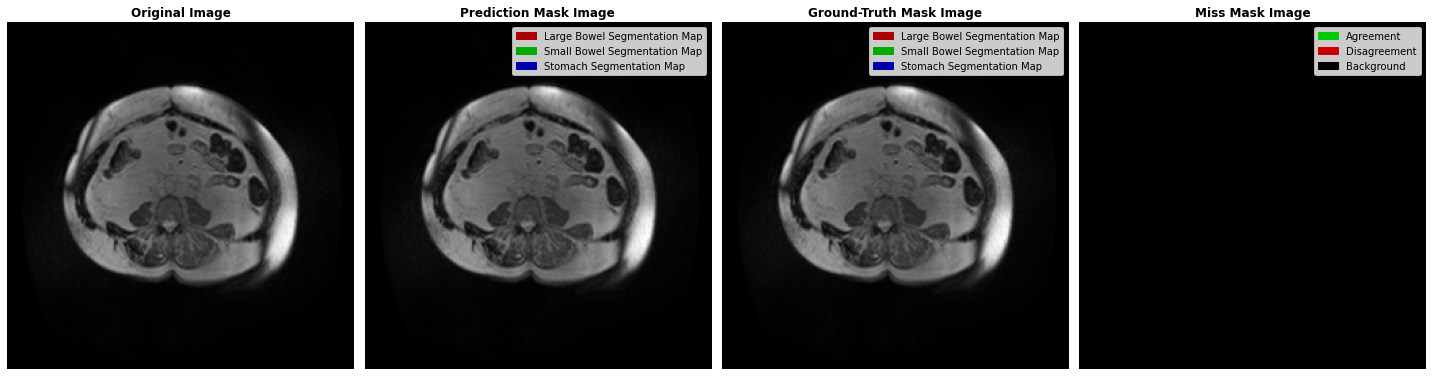

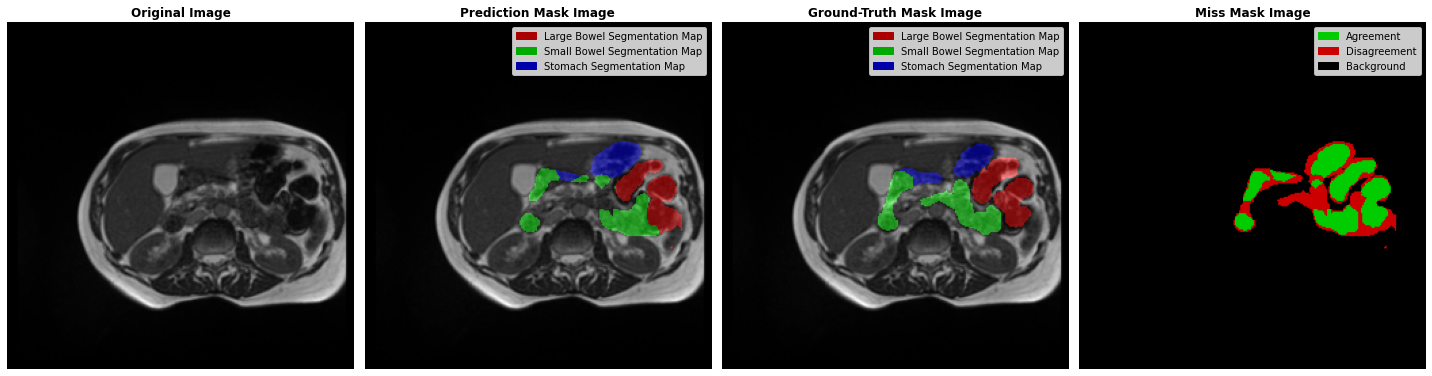

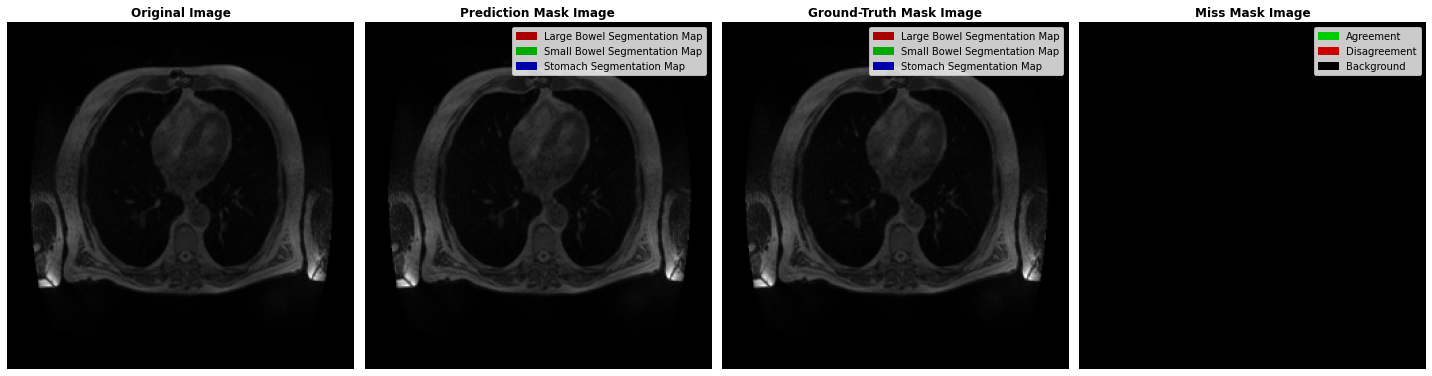

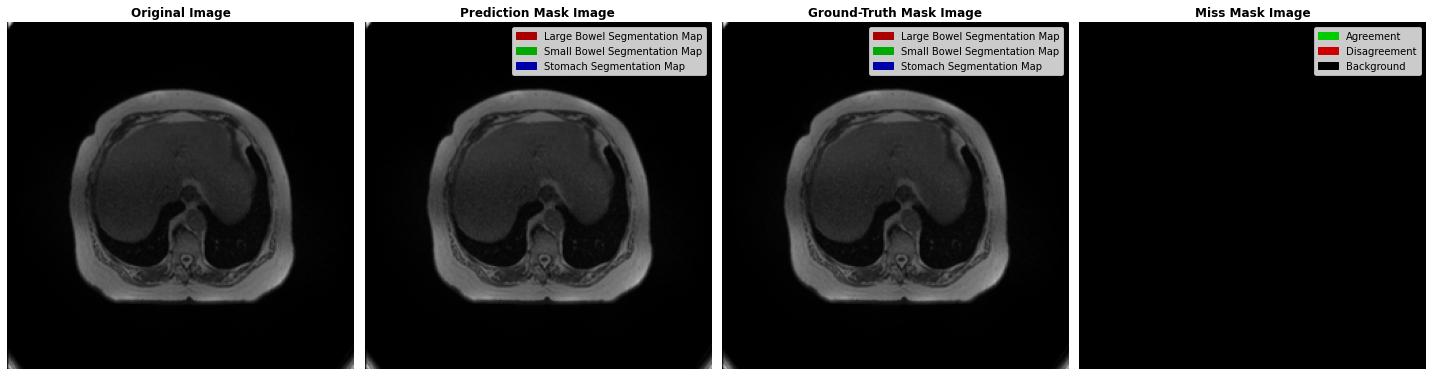

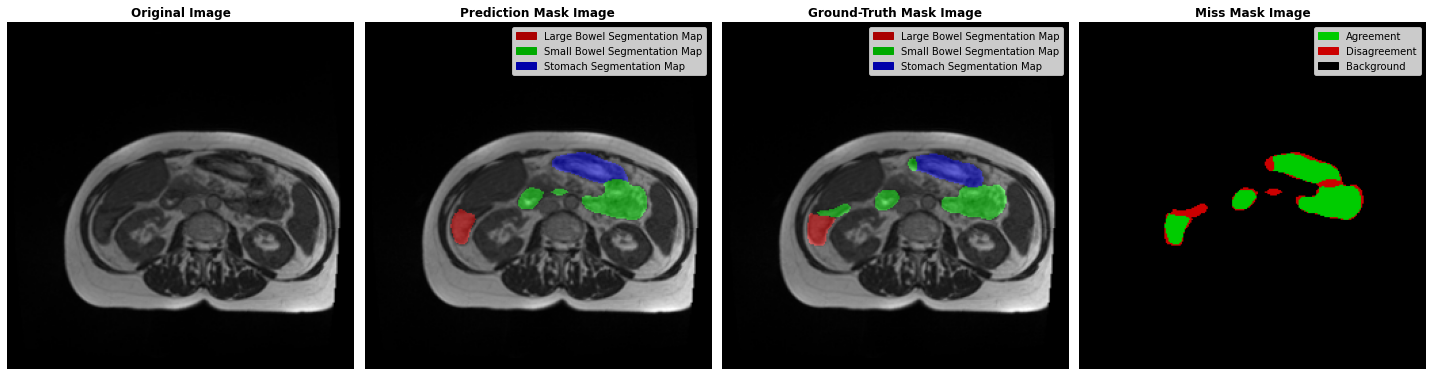

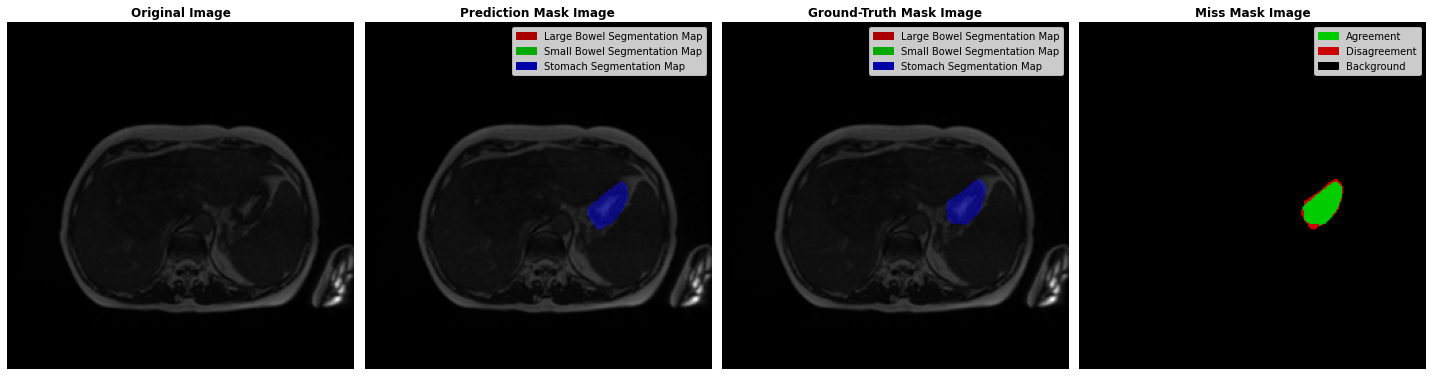

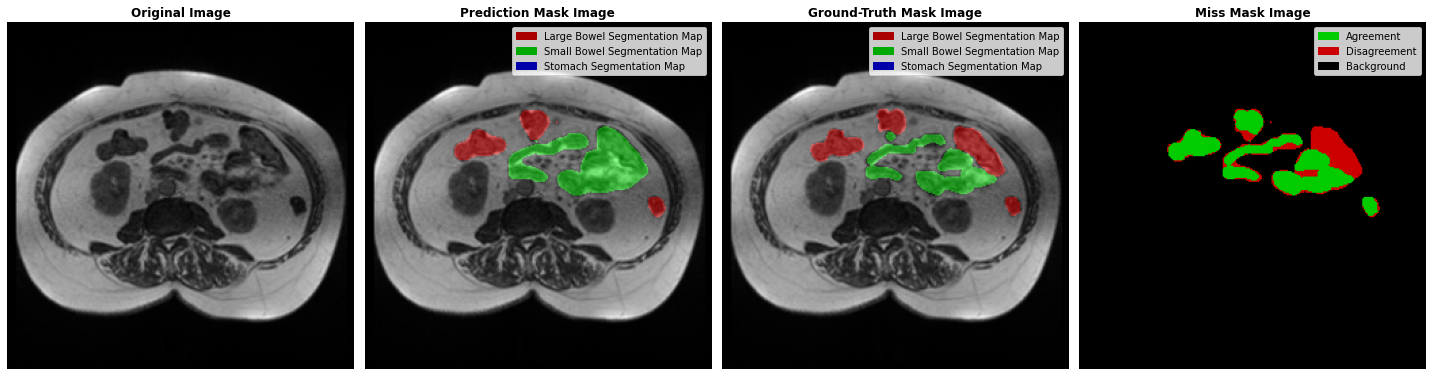

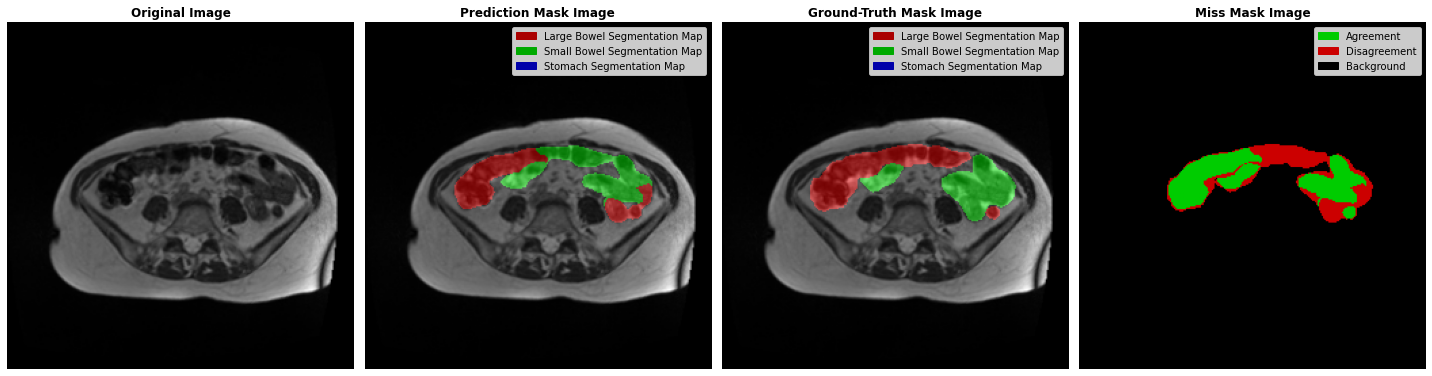

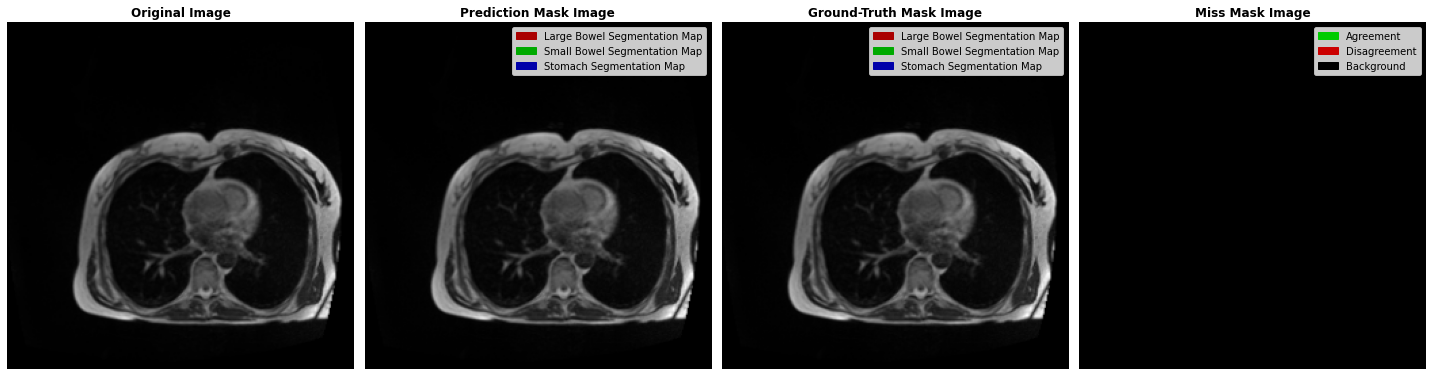

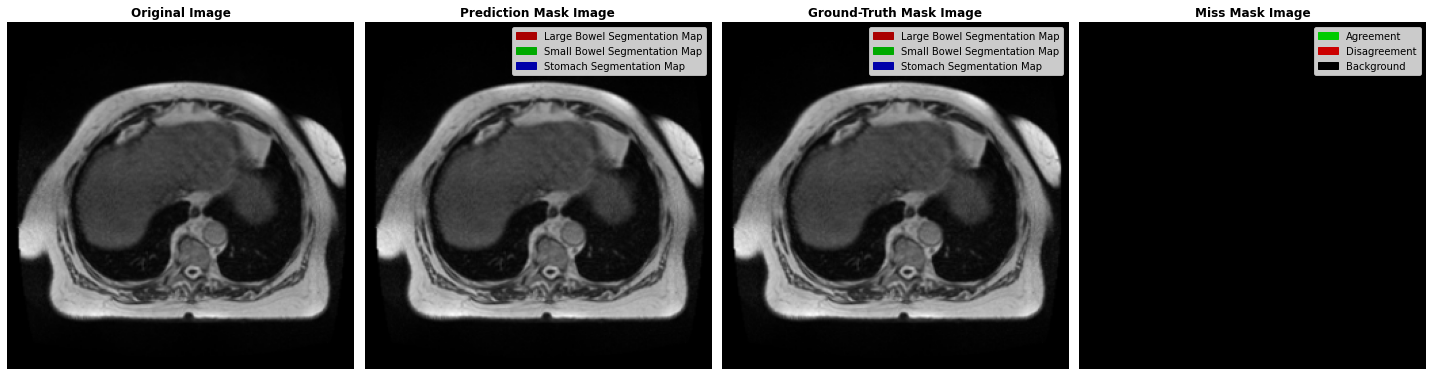

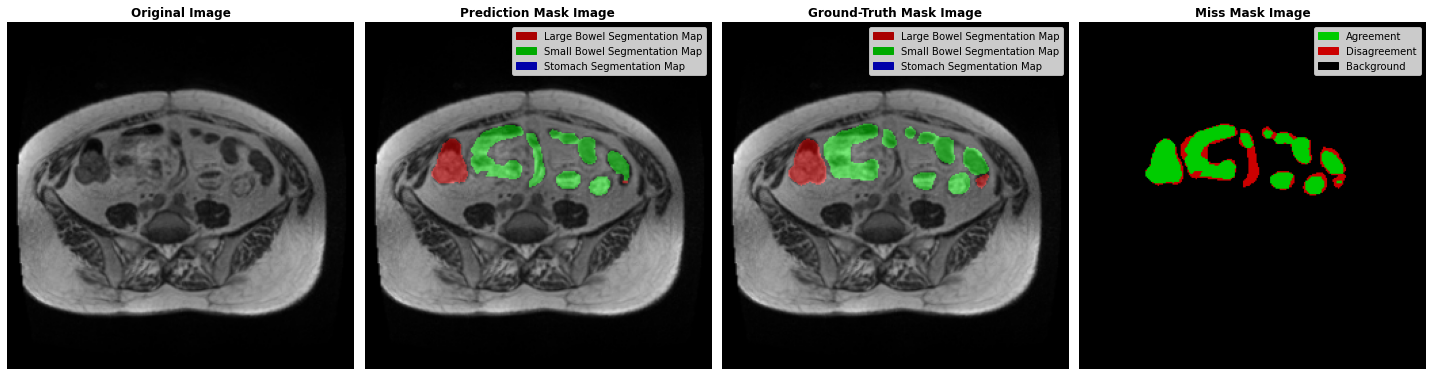

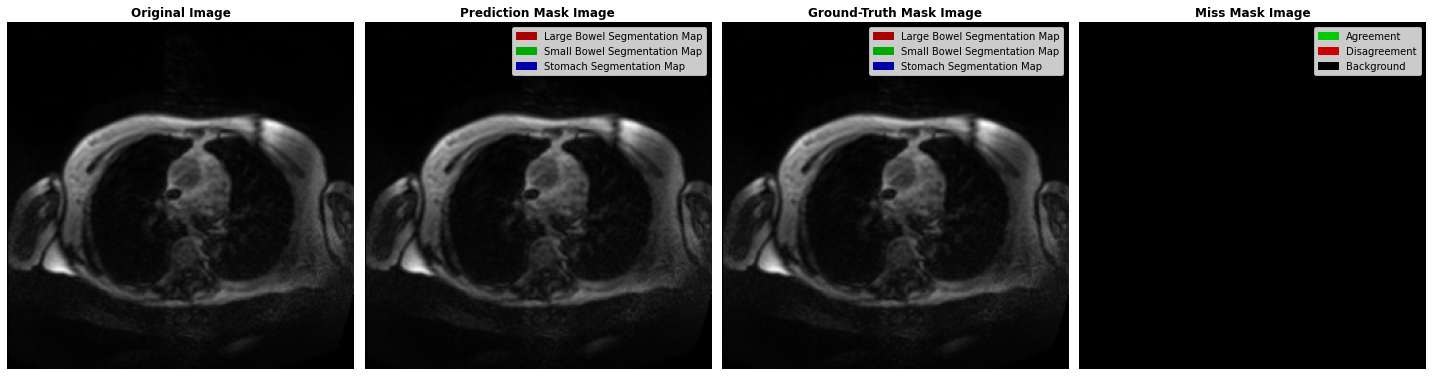

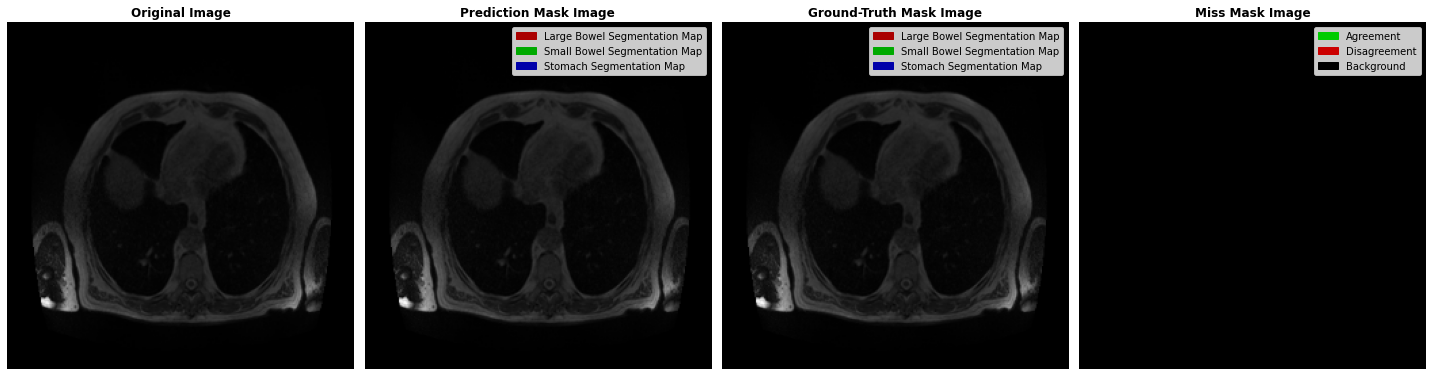

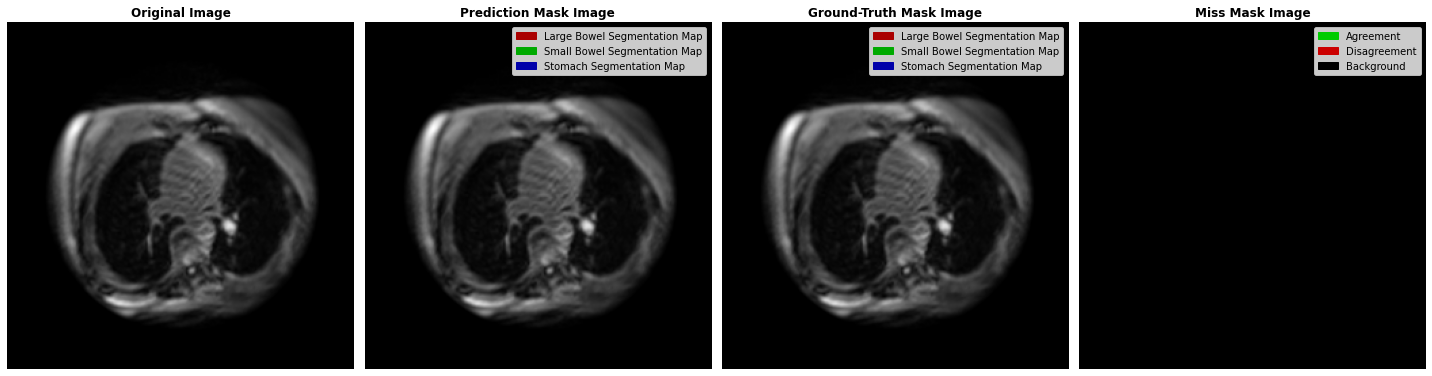

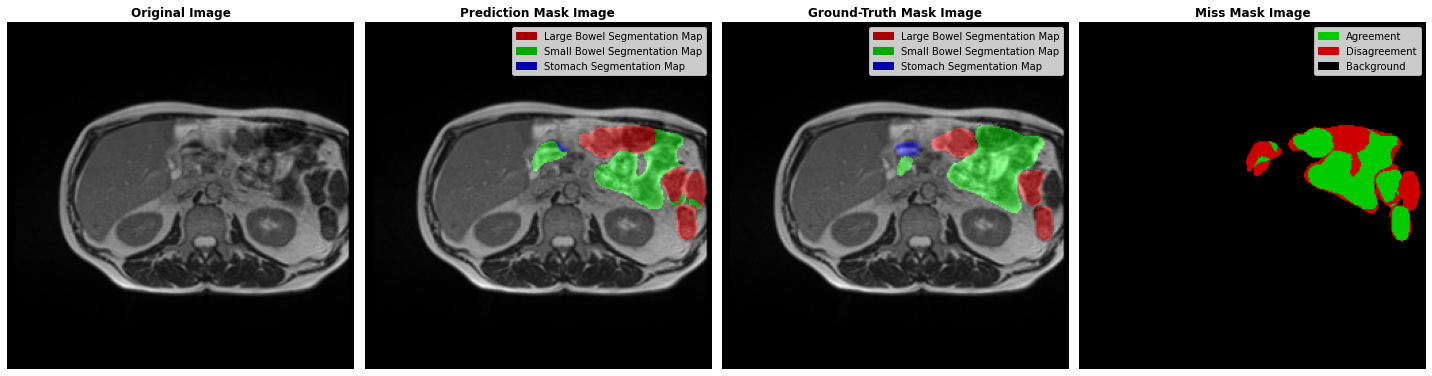

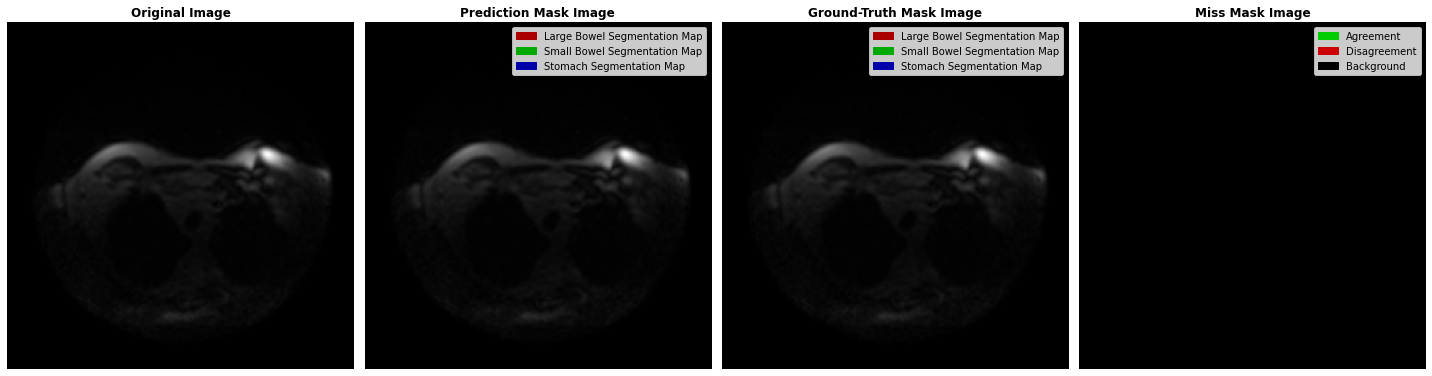

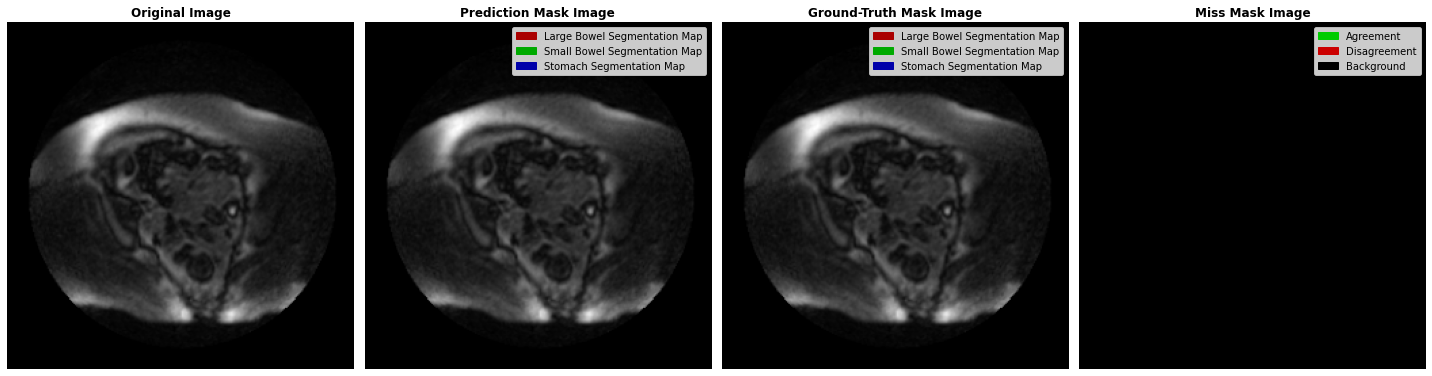

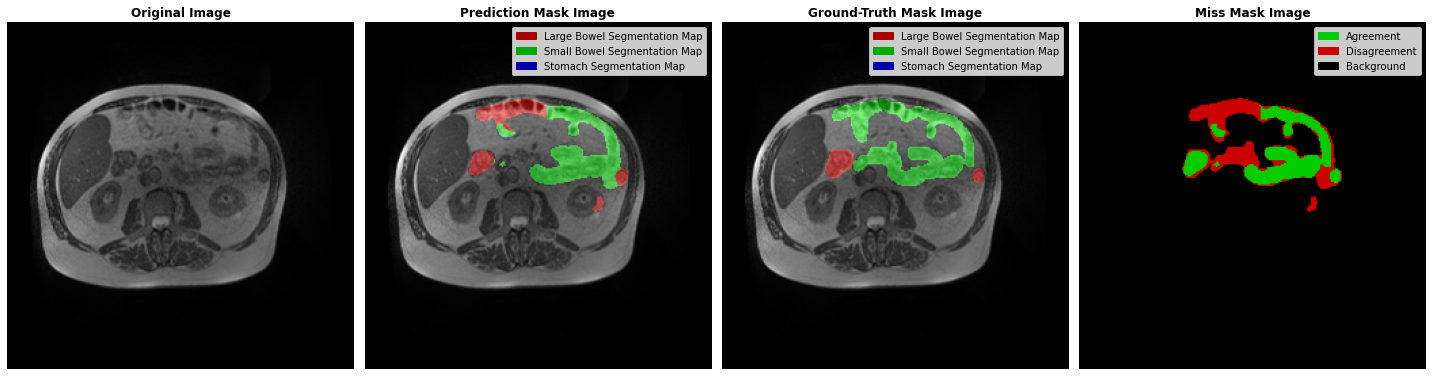

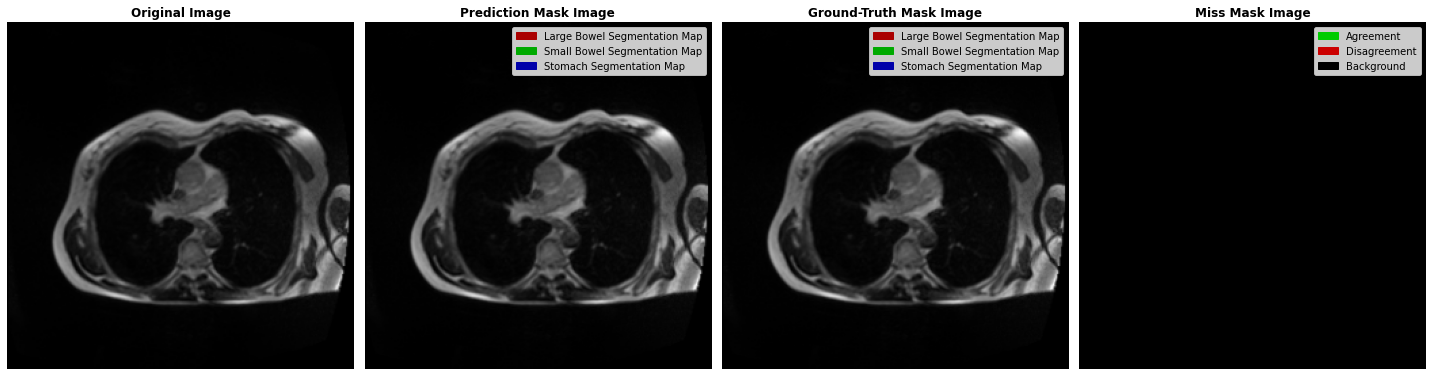

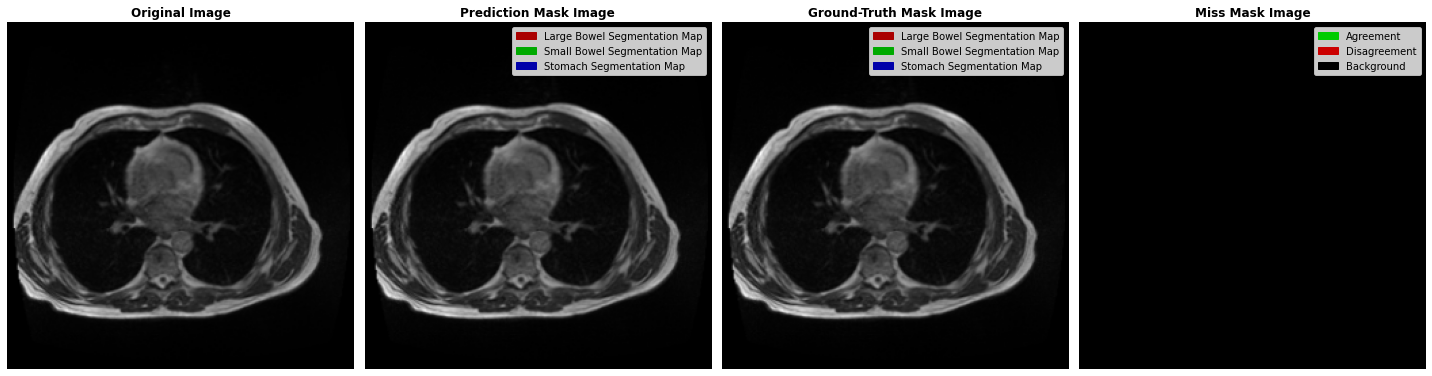

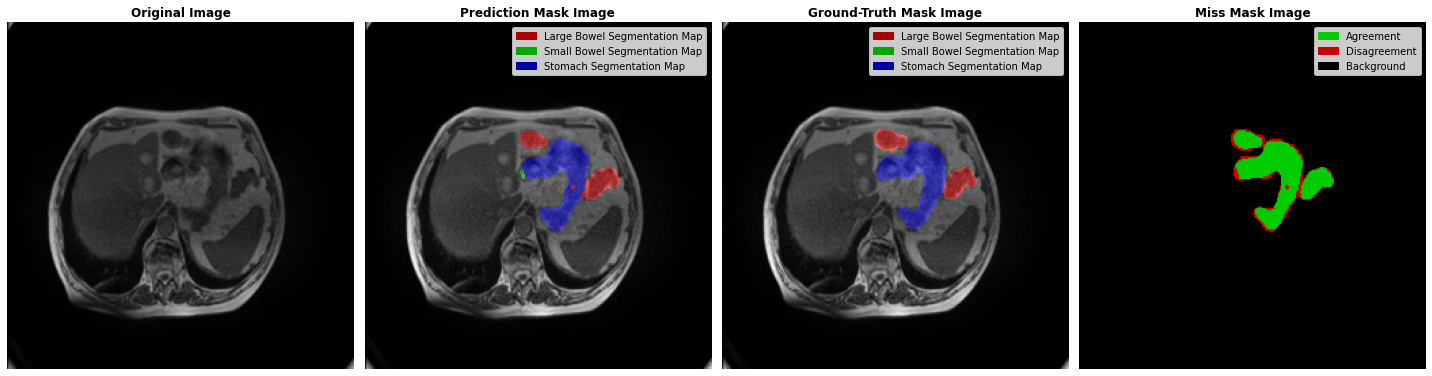

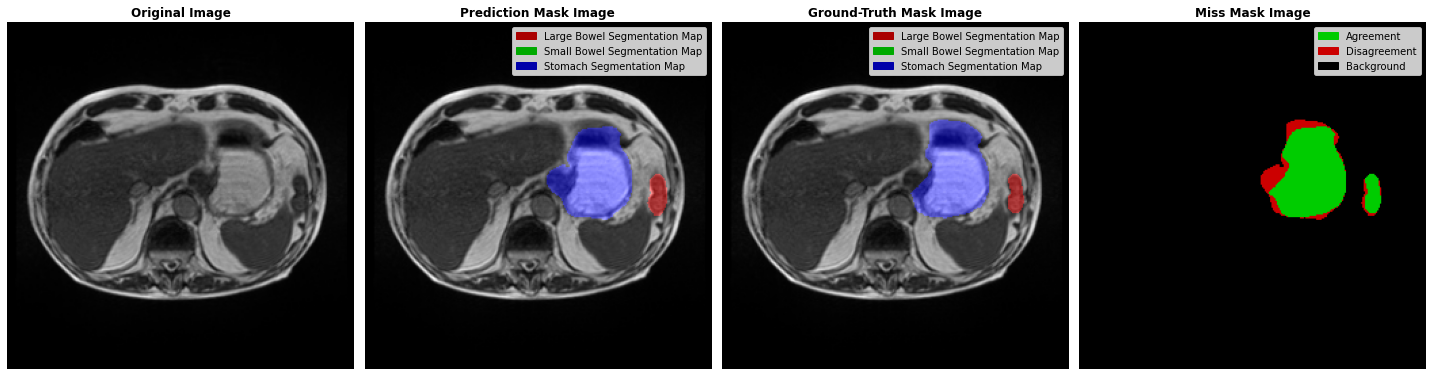

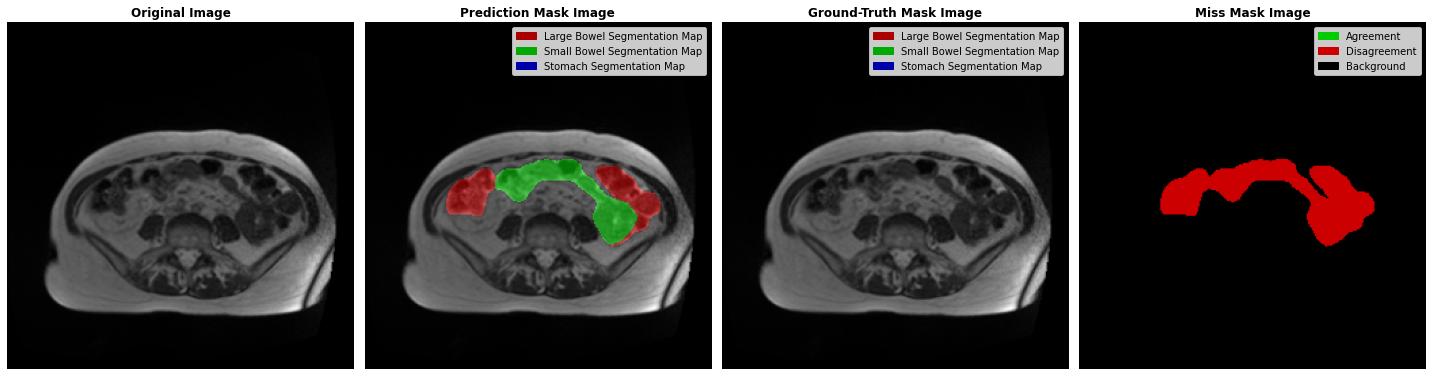

In [14]:
def get_overlay(img, mask, _alpha=0.999, _beta=0.45, _gamma=0):
    
    # Normalize to be between 0-1 (float32)
    img = (img/img.max()).astype(np.float32)
    
    # Make mask RGB and float32
    if len(mask.shape)==2:
        mask_rgb = np.zeros_like(img, dtype=np.float32)
        mask_rgb[..., 2] = np.where(mask==3, 1.0, 0.0)
        mask_rgb[..., 1] = np.where(mask==2, 1.0, 0.0)
        mask_rgb[..., 0] = np.where(mask==1, 1.0, 0.0)
    else:
        mask_rgb=mask.astype(np.float32)
    
    # overlay
    seg_overlay = cv2.addWeighted(src1=img, alpha=_alpha, 
                                  src2=mask_rgb, beta=_beta, gamma=_gamma)
    return seg_overlay

def get_miss_overlay(gt_mask, pred_mask, _alpha=0.9, _beta=0.25, _gamma=0):
    
    # Make mask RGB and float32
    miss_rgb = np.zeros((*pred_mask.shape[:2],3), dtype=np.float32)
    
    if len(pred_mask.shape)==2:
        miss_rgb[..., 1] = np.where((gt_mask==pred_mask)&(gt_mask!=0), 0.8, 0.0)
        miss_rgb[..., 0] = np.where((gt_mask!=pred_mask), 0.8, 0.0)
    else:
        
        miss_rgb = np.where((gt_mask==pred_mask)&(gt_mask!=0.0), (0.0,0.8,0.0), (0.0,0.0,0.0))
        miss_rgb = np.where((gt_mask!=pred_mask), (0.8,0.0,0.0), miss_rgb)
        
    return miss_rgb

def plot_preds(img, pred_mask, gt_mask):
    gt_overlay = get_overlay(img, gt_mask)
    pred_overlay = get_overlay(img, pred_mask)
    miss_overlay = get_miss_overlay(gt_mask, pred_mask)
    
    plt.figure(figsize=(20,12))
    
    for i, (_desc, _img) in enumerate(zip(["Original", "Prediction Mask", "Ground-Truth Mask", "Miss Mask"], [img, pred_overlay, gt_overlay, miss_overlay])):        
        plt.subplot(1,4,i+1)
        plt.imshow(_img)
        plt.title(f"{_desc} Image", fontweight="bold")        
        plt.axis(False)
        
        if i in [1,2]:
            handles = [Rectangle((0,0),1,1, color=_c) for _c in [(0.667,0.0,0.0), (0.0,0.667,0.0), (0.0,0.0,0.667)]]
            labels = ["Large Bowel Segmentation Map", "Small Bowel Segmentation Map", "Stomach Segmentation Map"]
            plt.legend(handles,labels)
        elif i==3:
            handles = [Rectangle((0,0),1,1, color=_c) for _c in [(0.0,0.8,0.0), (0.8,0.0,0.0), (0.0, 0.0, 0.0)]]
            labels = ["Agreement", "Disagreement", "Background"]
            plt.legend(handles,labels)
    plt.tight_layout()
    plt.show()

if DEBUG:
    for img_batch, mask_batch in val_ds.take(1):
        pred_batch = deeplabv3plus(img_batch)

        if STYLE=="multilabel":
            pred_batch = np.where(pred_batch>=0.5, 1.0, 0.0)
        else:
            pred_batch = np.argmax(pred_batch, axis=-1)

        img_batch = ((img_batch+1)*127.5).numpy().astype(np.int32)
        mask_batch = mask_batch.numpy().squeeze().astype(np.float32)
        break

    for _img, _pred, _mask in zip(img_batch, pred_batch, mask_batch):
        plot_preds(_img, _pred, _mask)

<br>


<a id="model_inference"></a>


<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: teal; background-color: #ffffff;" id="model_inference">
    5&nbsp;&nbsp;MODEL INFERENCE&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a>
</h1>

---

**Only run this when things are done as masks will be deleted**

In [15]:
!rm -rf ./multi*

In [16]:
def pred_2_rle(pred_arr, root_shape):
    
    # Get correct size pred array based on initial slice size
    pred_arr = cv2.resize(pred_arr, root_shape, interpolation=cv2.INTER_NEAREST)
    
    # Get individual segmentation masks
    lb_mask = np.where(pred_arr==1,1,0)
    sb_mask = np.where(pred_arr==2,1,0)
    st_mask = np.where(pred_arr==3,1,0)
    
    return rle_encode(lb_mask), rle_encode(sb_mask), rle_encode(st_mask)

N_TEST = int(np.ceil((len(ss_df)//3)/BATCH_SIZE))

# Loop over batches and get prediction
for i, img_batch in tqdm(enumerate(test_ds), total=N_TEST):
    
    # Cleanup every so often
    if i%100==0:
        gc.collect(); gc.collect(); tf.keras.backend.clear_session(); gc.collect()    
    
    # Get predictions
    pred_batch = tf.argmax(deeplabv3plus(img_batch, training=False), axis=-1).numpy()
    
    # Loop over prediction and determine submission dataframe index (3*individual-count because of reduced inference size)
    for j, _pred in enumerate(pred_batch):
        df_idx = 3*(i*BATCH_SIZE+j)
        pred_rles = pred_2_rle(_pred, (ss_df.iloc[df_idx]["slice_h"], ss_df.iloc[df_idx]["slice_w"]))
        
        # Loop over rles and assign the correct row of the submission dataframe
        for k,pred_rle in enumerate(pred_rles):
            ss_df.loc[df_idx+k, "predicted"] = pred_rle

  0%|          | 0/911 [00:00<?, ?it/s]

In [17]:
# Helper functions
def fix_empty_slices(_row):
    if int(_row["slice_id"].rsplit("_", 1)[-1]) in remove_seg_slices[_row["class"]]:
        _row["predicted"] = ""
    return _row

def is_isolated(_row):
    return (_row["predicted"]!="" and _row["prev_predicted"]=="" and _row["next_predicted"]=="")

def fix_nc_slices(_row):
    if _row["seg_isolated"]:
        _row["predicted"] = ""
    return _row

# No segmentation exists at these slices
remove_seg_slices = {
     "large_bowel": [1, 138, 139, 140, 141, 142, 143, 144],
    "small_bowel": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 138, 139, 140, 141, 142, 143, 144],
    "stomach": [1, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144],
}

# Heuristic processing
ss_df = ss_df.apply(fix_empty_slices, axis=1)
ss_df["prev_predicted"] = ss_df.shift(3, fill_value="")["predicted"]
ss_df["next_predicted"] = ss_df.shift(-3, fill_value="")["predicted"]
ss_df["seg_isolated"] = ss_df.apply(is_isolated, axis=1)
ss_df = ss_df.apply(fix_nc_slices, axis=1)

# Submit
ss_df = ss_df[["id", "class", "predicted"]]
ss_df.to_csv("submission.csv", index=False)
display(ss_df)

id        class predicted
0      case123_day20_slice_0001  large_bowel          
1      case123_day20_slice_0001  small_bowel          
2      case123_day20_slice_0001      stomach          
3      case123_day20_slice_0002  large_bowel          
4      case123_day20_slice_0002  small_bowel          
...                         ...          ...       ...
65563  case124_day19_slice_0143  small_bowel          
65564  case124_day19_slice_0143      stomach          
65565  case124_day19_slice_0144  large_bowel          
65566  case124_day19_slice_0144  small_bowel          
65567  case124_day19_slice_0144      stomach          

[65568 rows x 3 columns]